<a href="https://colab.research.google.com/github/rajagopalmotivate/try1/blob/master/DCGAN_for_odd_sized_images_ver22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dual Generator learns to pair images

In [0]:
from IPython.display import Image
from keras.utils import plot_model
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

In [0]:
!pip install pydot pydot-ng


In [0]:
from IPython.display import Image
from keras.utils import plot_model

In [0]:
# Restart runtime to allow Jupyter to know the changes above
import os
#os._exit(0)

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, Average, merge
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from google.colab import files
import copy 

In [0]:
def load_large_data():
    (X_train1, ytrain1), (_, _) = mnist.load_data()
    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([100000,28,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 1000):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*1000 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 600])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_dataPaired():
    
    (X_train1, ytrain1), (_, _) = mnist.load_data()
   # (X_train1, ytrain1), (_, _) = fashion_mnist.load_data()

    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_train1label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label3 = np.zeros([10000,28,28],dtype=np.uint8)
    
    
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain1[i]==0):
        X_train1label0[count0] = X_train1[i]
        count0 = count0 +1 
      if(ytrain1[i]==1):
        X_train1label1[count1] = X_train1[i]
        count1 = count1 +1
      if(ytrain1[i]==2):
        X_train1label2[count2] = X_train1[i]
        count2 = count2 +1
      if(ytrain1[i]==3):
        X_train1label3[count3] = X_train1[i]
        count3 = count3 +1
        
    
    totalsamples = 50000
    X_trainlarge = np.zeros([50000,28,56],dtype=np.uint8)
    
    fillount = 0
    for i in range(0, 10000): 
          if( (fillount + 3) > totalsamples  ):
            break
          aimage1 = X_train1label0[i]
          aimage2 = X_train1label1[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1
          aimage1 = X_train1label1[i]
          aimage2 = X_train1label2[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1          
          aimage1 = X_train1label2[i]
          aimage2 = X_train1label3[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*10 + j + 14700])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)

    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_data5656():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,56,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([56,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
X_trainlarge = load_large_data()

In [0]:
#X_trainlarge5656 = load_large_data5656()

In [0]:
X_trainlargepaired = load_large_dataPaired()

In [0]:
def load_databydatasetname(datasetname):
  if (datasetname == 1):   
    (X_train, _), (_, _) = mnist.load_data()
  if (datasetname == 2):   
    (X_train, _), (_, _) = fashion_mnist.load_data()
  if (datasetname == 3):   
     X_train = X_trainlarge
  if (datasetname == 4):   
     X_train = X_trainlarge5656
  if (datasetname == 5):   
     X_train = X_trainlargepaired
      
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)
  return X_train
  

In [0]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
  #  print("-- Discriminator -- ")
   # model.summary()
    return model

In [0]:
def save_imgs(generator, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()

In [0]:
def save_imgs_all(generator1, generator2, generator3, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator1.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()
    
    gen_imgs = generator2.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()
    
    gen_imgs = generator3.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

In [0]:


def plotamodel(amodel, showdetails=True):
  # Model summary
  print(amodel.summary())

  if (showdetails==True):
    # Plot model graph
    plot_model(amodel, show_shapes=True, show_layer_names=True, to_file='model.png')
    #Image(retina=True, filename='model.png')
  if (showdetails==False):
    # Plot model graph
    plot_model(amodel, show_shapes=False, show_layer_names=False, to_file='modelsmall.png')
   # Image(retina=True, filename='modelsmall.png')

In [0]:
def build_combined_model():

    discriminatormymodel = build_classifier_model

    generatormymodel = build_generator_model()
   
    optimizer1 = Adam(lr=0.0002, beta_1=0.5)


    z = Input(shape=(100,))
    img = generatormymodel(z)
    discriminatormymodel.trainable = False
    real = discriminatormymodel(img)
    
    combined = Model(z, real)
    
    combined.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return combined

In [0]:
def getlastlayer(amodel):
  for layer in amodel.layers:
    layerlast = layer
  print(layer)
  print(layer.get_config())
  print(layer.input)
  print(layer.input_shape)
  print(layer.output)
  print('output shape of last is ')
  print(layer.output_shape)
  return layer

In [0]:
def build_modelsNandriNEW(averagemode = 1, loadpretrainedweights=False):
    z = Input(shape=(100,))
    inputz = z
    x = Dense(128 * 7 * 7, activation="relu")(inputz)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)    
    generator1 = Model(inputz, out)
    
    inputz2 = z
    x1 = Dense(128 * 7 * 7, activation="relu")(inputz2)
    x1 = Reshape((7, 7, 128))(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(128, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(64, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = Conv2D(1, kernel_size=3, padding="same")(x1)
    out1 = Activation("tanh")(x1)    
    generator2 = Model(inputz2, out1)
    
    
    img1 = generator1(z)
    img2 = generator2(z)
    
    
    aoptimizer = Adam(lr=0.0002, beta_1=0.5)   
    discriminator = build_discriminator(img_shape=(28, 56, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
    
    if(averagemode == 1):
          models = [generator1, generator1]
    if(averagemode == 2):
          models = [generator2, generator2]
    if(averagemode == 3):
          models = [generator1, generator2]


  ##  models = [generator1, generator2]
 ##   models = [generator1, generator1]
    outputs = [model.outputs[0] for model in models]
    for obj1 in outputs:
      print(type(obj1))
      print(obj1.shape)
        
    mergedlayer = Concatenate(axis=2)(outputs)
    ##x = merge([lstm_out, auxiliary_input], mode='concat')
   ## output = merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)
  #  mergedlayer = merge([generator1, generator2], mode='concat', concat_axis=1)
  
   #mergedlayer = merge([out1, out], mode='concat', concat_axis=1)
#contact axis can be -1 to 0 , 1 for inception , 2 , 3 or remove it
  #  mergedlayer = merge([generator1, generator1])

    print('merge layers')
    print(out1.shape)
    print(out.shape)
    print(mergedlayer.shape)

  

    
    
    mergedmodel = Model(z, mergedlayer)
    
    discriminator.trainable = False
    real = discriminator(mergedlayer)
    combined = Model(z, real)
   # discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
  
        

    
    if(loadpretrainedweights==True):
      #generator1.load_weights('my_model_weights_mnistver2.h5')
      generator1.load_weights('my_model_weights_orgmnist.h5')
      #generator2.load_weights('my_model_weights_mnist.h5')
      #generator1 = load_model('generator2fmnist.h5')
      #generator2 = load_model('generator2fmnist.h5')
      

    generator1.trainable = False
    
    generator1.compile(loss='binary_crossentropy', optimizer=aoptimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    combined.compile(loss='binary_crossentropy', optimizer=aoptimizer) 
  
   # plotamodel(mergedmodel)
   # plotamodel(combined)
    
    return generator1, generator2, discriminator, combined ,  mergedmodel

In [0]:
def train(generator1, generator2, discriminator, combined, mergedmodel,  epochs=2000, batch_size=128, save_interval=50, modeltotrain=1):

    X_train = load_databydatasetname(2)
    X_train5656 = None

    
    if modeltotrain == 3:
          X_train5656 = load_databydatasetname(3)
         # X_train = load_databydatasetname(5)

    num_examples = X_train.shape[0]
    num_batches = int(num_examples / float(batch_size))
    print('Number of examples: ', num_examples)
    print('Number of Batches: ', num_batches)
    print('Number of epochs: ', epochs)

    half_batch = int(batch_size / 2)
    ##quater_batch = int(half_batch / 2) 

    for epoch in range(epochs + 1):
        for batch in range(num_batches):
            noise1 = np.random.normal(0, 1, (half_batch, 100))
            fake_images1 = generator1.predict(noise1)
            fake_labels1 = np.zeros((half_batch, 1))
            
           ## noise2 = np.random.normal(0, 1, (half_batch, 100))
            noise2 = copy.deepcopy(noise1)
            fake_images2 = generator2.predict(noise2)
            fake_labels2 = np.zeros((half_batch, 1))
            
        
            
           ## fake_images = np.append(fake_images1 , fake_images2, axis=0)
           ## fake_labels = np.append( fake_labels1 , fake_labels2, axis=0)
            
            if modeltotrain == 1:
              fake_images = fake_images1
              fake_labels = fake_labels1
            if modeltotrain == 2:
              fake_images = fake_images2
              fake_labels = fake_labels2
            if modeltotrain == 3:
              noise2 = copy.deepcopy(noise1)
              fake_images3 = mergedmodel.predict(noise2)
              fake_labels3 = np.zeros((half_batch, 1))    
              fake_images = fake_images3
              fake_labels = fake_labels3              
            


            X_train = X_trainlarge
            X_train = X_trainlargepaired
            #X_train = X_train5656
            # real images for batch
            idx = np.random.randint(0, X_train.shape[0], half_batch)            
            real_images = X_train[idx]
            real_labels = np.ones((half_batch, 1))
            
            if(batch == 0):
              print('noise half batch')
              print(noise1)
              print("G1 output numpy array shape")
              print(fake_images1.shape)
              print("G1+G2 appended numpy array shape")
              print(fake_images.shape)
              print("real images")
              print(real_images.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            # Plot the progress
            print("Epoch %d Batch %d/%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (epoch,batch, num_batches, d_loss[0], 100 * d_loss[1], g_loss))

            if batch % 100 == 0:
                 save_imgs_all(generator1, generator2, mergedmodel,  epoch, batch)
            #if batch % 101 == 0:
                 #save_imgs(generator2, epoch, batch)
            #if batch % 102 == 0:
                 #save_imgs(mergedmodel, epoch, batch)
                








In [0]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)




    
    

    


In [0]:
plotamodel(mergedmodel)

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnist.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnistver2.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_orgmnist.h5

  

  

In [0]:
plotamodel(combined)
files.download('model.png')




In [0]:
plotamodel(discriminator)
files.download('model.png')




In [0]:
#train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=10, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 2 ,  loadpretrainedweights=True)




    
    

    


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [32]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)


<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
merge layers
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 56, 1)


Number of examples:  60000
Number of Batches:  937
Number of epochs:  1
noise half batch
[[ 1.04525464 -1.49375507  0.64250734 ...  1.51976738  0.56852413
   0.17492724]
 [ 0.77413118  1.26407021  1.00201991 ... -0.09134574 -0.01234427
   0.66233759]
 [ 0.54208151 -0.92631123 -0.95705764 ... -0.33899618 -1.00882708
   0.65284097]
 ...
 [ 0.65781127 -1.51125318 -0.84023854 ... -0.32947062  0.24890372
  -1.72866434]
 [-0.24937167  0.47041065  0.63133289 ... -0.21029731 -0.31246132
  -0.53470531]
 [-1.04575245 -0.44133118 -0.60728901 ... -1.37001674 -0.53048331
   0.83921883]]
G1 output numpy array shape
(32, 28, 28, 1)
G1+G2 appended numpy array shape
(32, 28, 56, 1)
real images
(32, 28, 56, 1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0 Batch 0/937 [D loss: 1.199150, acc.: 35.94%] [G loss: 0.555634]


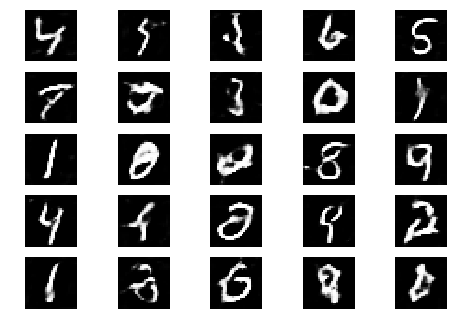

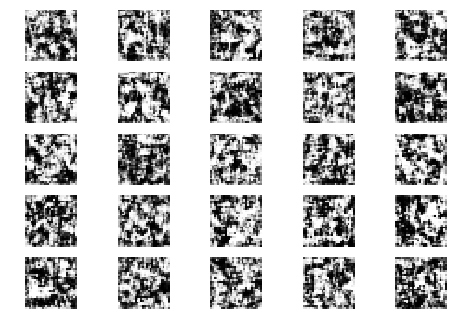

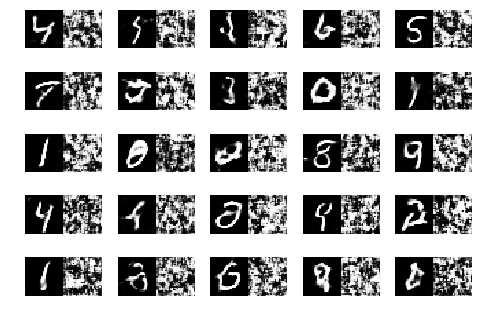

Epoch 0 Batch 1/937 [D loss: 0.591685, acc.: 73.44%] [G loss: 0.930989]
Epoch 0 Batch 2/937 [D loss: 0.516795, acc.: 75.00%] [G loss: 1.425885]
Epoch 0 Batch 3/937 [D loss: 0.406091, acc.: 85.94%] [G loss: 2.045625]
Epoch 0 Batch 4/937 [D loss: 0.254715, acc.: 95.31%] [G loss: 2.441070]
Epoch 0 Batch 5/937 [D loss: 0.154777, acc.: 98.44%] [G loss: 2.630310]
Epoch 0 Batch 6/937 [D loss: 0.178191, acc.: 100.00%] [G loss: 2.581974]
Epoch 0 Batch 7/937 [D loss: 0.137909, acc.: 100.00%] [G loss: 2.963971]
Epoch 0 Batch 8/937 [D loss: 0.087089, acc.: 98.44%] [G loss: 3.107709]
Epoch 0 Batch 9/937 [D loss: 0.057858, acc.: 100.00%] [G loss: 3.284207]
Epoch 0 Batch 10/937 [D loss: 0.105085, acc.: 96.88%] [G loss: 3.385511]
Epoch 0 Batch 11/937 [D loss: 0.126900, acc.: 98.44%] [G loss: 3.212618]
Epoch 0 Batch 12/937 [D loss: 0.135392, acc.: 95.31%] [G loss: 3.148191]
Epoch 0 Batch 13/937 [D loss: 0.114902, acc.: 98.44%] [G loss: 3.418953]
Epoch 0 Batch 14/937 [D loss: 0.154670, acc.: 93.75%] [G 

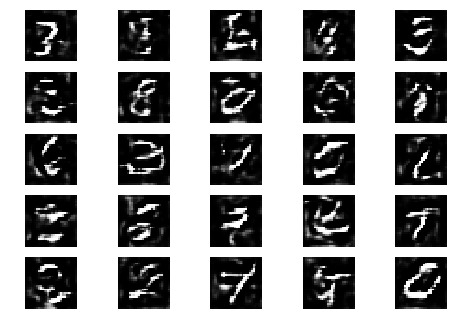

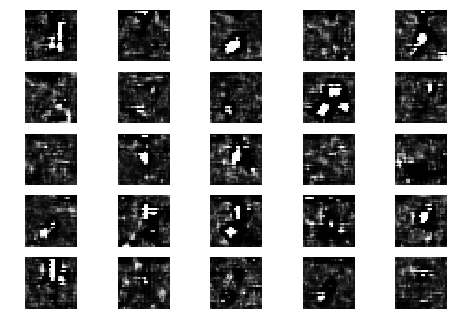

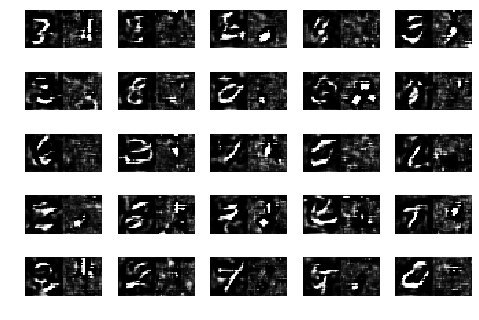

Epoch 0 Batch 101/937 [D loss: 0.934202, acc.: 46.88%] [G loss: 4.111564]
Epoch 0 Batch 102/937 [D loss: 1.515915, acc.: 28.12%] [G loss: 2.504400]
Epoch 0 Batch 103/937 [D loss: 0.467735, acc.: 82.81%] [G loss: 2.441723]
Epoch 0 Batch 104/937 [D loss: 0.872269, acc.: 53.12%] [G loss: 2.800800]
Epoch 0 Batch 105/937 [D loss: 1.323777, acc.: 26.56%] [G loss: 2.233927]
Epoch 0 Batch 106/937 [D loss: 0.977290, acc.: 46.88%] [G loss: 2.899554]
Epoch 0 Batch 107/937 [D loss: 0.761597, acc.: 53.12%] [G loss: 2.667500]
Epoch 0 Batch 108/937 [D loss: 0.599871, acc.: 65.62%] [G loss: 2.880620]
Epoch 0 Batch 109/937 [D loss: 0.342790, acc.: 85.94%] [G loss: 2.366894]
Epoch 0 Batch 110/937 [D loss: 0.889229, acc.: 57.81%] [G loss: 2.256493]
Epoch 0 Batch 111/937 [D loss: 0.685542, acc.: 59.38%] [G loss: 2.338013]
Epoch 0 Batch 112/937 [D loss: 0.716710, acc.: 62.50%] [G loss: 1.596171]
Epoch 0 Batch 113/937 [D loss: 0.848514, acc.: 64.06%] [G loss: 2.206239]
Epoch 0 Batch 114/937 [D loss: 0.65445

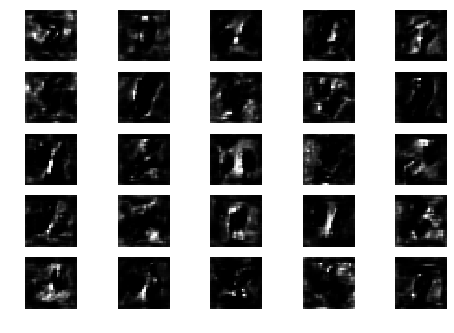

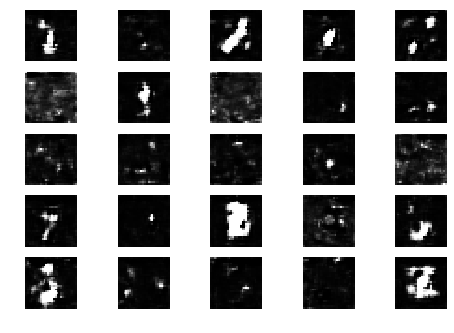

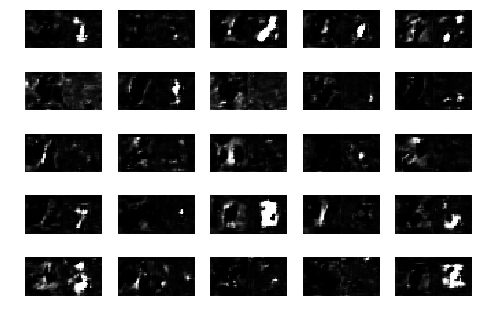

Epoch 0 Batch 201/937 [D loss: 0.585568, acc.: 62.50%] [G loss: 1.375334]
Epoch 0 Batch 202/937 [D loss: 0.660893, acc.: 57.81%] [G loss: 1.574720]
Epoch 0 Batch 203/937 [D loss: 0.623029, acc.: 62.50%] [G loss: 1.661804]
Epoch 0 Batch 204/937 [D loss: 0.698783, acc.: 51.56%] [G loss: 1.597417]
Epoch 0 Batch 205/937 [D loss: 0.846483, acc.: 59.38%] [G loss: 1.521702]
Epoch 0 Batch 206/937 [D loss: 0.800277, acc.: 62.50%] [G loss: 1.893160]
Epoch 0 Batch 207/937 [D loss: 0.918692, acc.: 53.12%] [G loss: 1.852816]
Epoch 0 Batch 208/937 [D loss: 0.577015, acc.: 71.88%] [G loss: 1.925862]
Epoch 0 Batch 209/937 [D loss: 0.915491, acc.: 59.38%] [G loss: 1.482965]
Epoch 0 Batch 210/937 [D loss: 0.690565, acc.: 73.44%] [G loss: 1.362973]
Epoch 0 Batch 211/937 [D loss: 0.721088, acc.: 59.38%] [G loss: 1.826253]
Epoch 0 Batch 212/937 [D loss: 0.777070, acc.: 62.50%] [G loss: 1.353693]
Epoch 0 Batch 213/937 [D loss: 0.549955, acc.: 73.44%] [G loss: 1.567336]
Epoch 0 Batch 214/937 [D loss: 0.56439

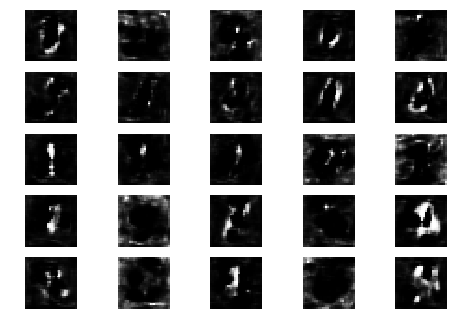

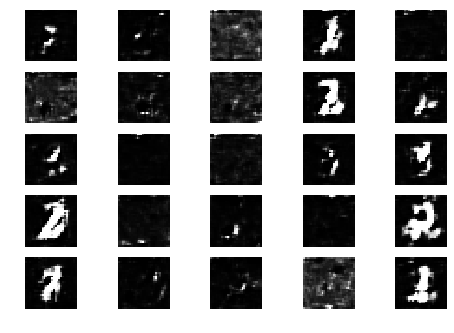

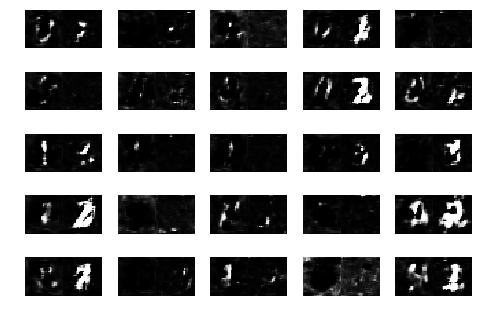

Epoch 0 Batch 301/937 [D loss: 0.742757, acc.: 50.00%] [G loss: 1.618795]
Epoch 0 Batch 302/937 [D loss: 0.614576, acc.: 65.62%] [G loss: 1.393247]
Epoch 0 Batch 303/937 [D loss: 0.636780, acc.: 62.50%] [G loss: 1.429440]
Epoch 0 Batch 304/937 [D loss: 0.522823, acc.: 71.88%] [G loss: 1.547835]
Epoch 0 Batch 305/937 [D loss: 0.646191, acc.: 68.75%] [G loss: 1.392018]
Epoch 0 Batch 306/937 [D loss: 0.748245, acc.: 56.25%] [G loss: 1.533847]
Epoch 0 Batch 307/937 [D loss: 0.775633, acc.: 51.56%] [G loss: 1.449730]
Epoch 0 Batch 308/937 [D loss: 0.611558, acc.: 70.31%] [G loss: 1.163172]
Epoch 0 Batch 309/937 [D loss: 0.848813, acc.: 42.19%] [G loss: 1.246867]
Epoch 0 Batch 310/937 [D loss: 0.533032, acc.: 71.88%] [G loss: 1.420502]
Epoch 0 Batch 311/937 [D loss: 0.652770, acc.: 64.06%] [G loss: 1.196425]
Epoch 0 Batch 312/937 [D loss: 0.774934, acc.: 57.81%] [G loss: 1.688206]
Epoch 0 Batch 313/937 [D loss: 0.727102, acc.: 60.94%] [G loss: 1.500495]
Epoch 0 Batch 314/937 [D loss: 0.72221

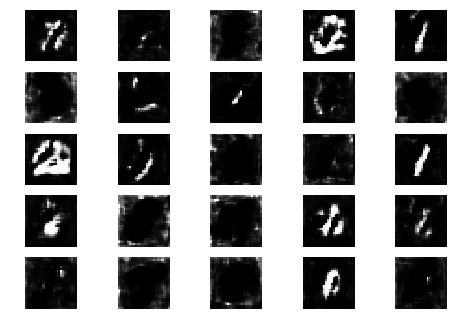

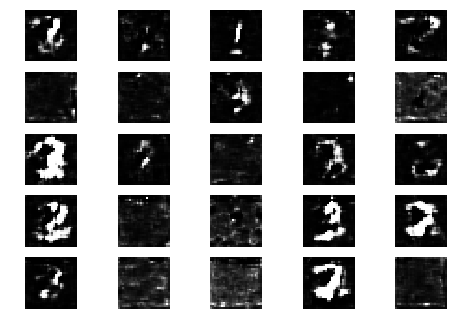

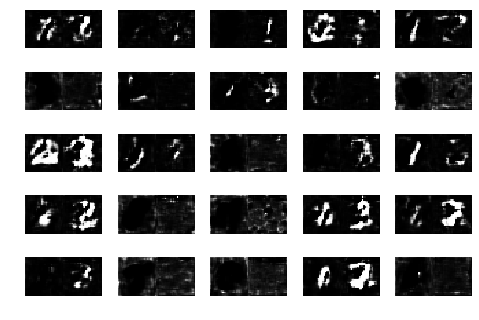

Epoch 0 Batch 401/937 [D loss: 0.693723, acc.: 59.38%] [G loss: 1.435596]
Epoch 0 Batch 402/937 [D loss: 0.695333, acc.: 68.75%] [G loss: 1.375795]
Epoch 0 Batch 403/937 [D loss: 0.864911, acc.: 40.62%] [G loss: 1.474804]
Epoch 0 Batch 404/937 [D loss: 0.758658, acc.: 56.25%] [G loss: 1.496311]
Epoch 0 Batch 405/937 [D loss: 0.742097, acc.: 54.69%] [G loss: 1.335296]
Epoch 0 Batch 406/937 [D loss: 0.676194, acc.: 64.06%] [G loss: 1.381074]
Epoch 0 Batch 407/937 [D loss: 0.841122, acc.: 51.56%] [G loss: 1.158916]
Epoch 0 Batch 408/937 [D loss: 0.574539, acc.: 68.75%] [G loss: 1.203988]
Epoch 0 Batch 409/937 [D loss: 0.699123, acc.: 56.25%] [G loss: 0.777257]
Epoch 0 Batch 410/937 [D loss: 0.783797, acc.: 51.56%] [G loss: 1.298759]
Epoch 0 Batch 411/937 [D loss: 0.608384, acc.: 67.19%] [G loss: 1.369074]
Epoch 0 Batch 412/937 [D loss: 0.658808, acc.: 67.19%] [G loss: 1.103999]
Epoch 0 Batch 413/937 [D loss: 0.649958, acc.: 67.19%] [G loss: 1.133536]
Epoch 0 Batch 414/937 [D loss: 0.64740

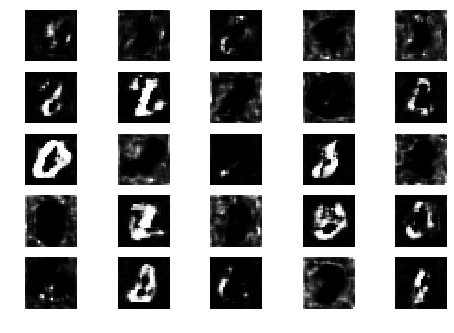

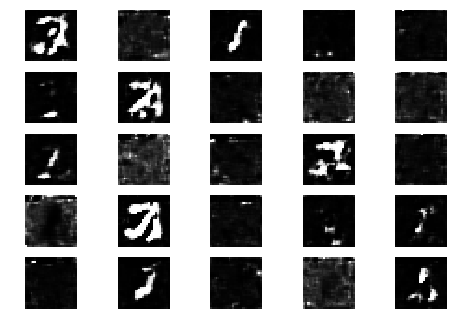

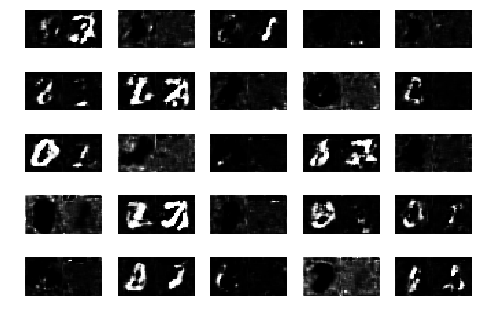

Epoch 0 Batch 501/937 [D loss: 0.597820, acc.: 75.00%] [G loss: 1.494780]
Epoch 0 Batch 502/937 [D loss: 0.873610, acc.: 48.44%] [G loss: 1.049561]
Epoch 0 Batch 503/937 [D loss: 0.704411, acc.: 60.94%] [G loss: 1.380917]
Epoch 0 Batch 504/937 [D loss: 0.696197, acc.: 68.75%] [G loss: 1.494938]
Epoch 0 Batch 505/937 [D loss: 0.870307, acc.: 50.00%] [G loss: 1.061978]
Epoch 0 Batch 506/937 [D loss: 0.726797, acc.: 62.50%] [G loss: 1.132389]
Epoch 0 Batch 507/937 [D loss: 0.685609, acc.: 56.25%] [G loss: 1.297127]
Epoch 0 Batch 508/937 [D loss: 0.569564, acc.: 70.31%] [G loss: 1.319676]
Epoch 0 Batch 509/937 [D loss: 0.607925, acc.: 65.62%] [G loss: 1.267834]
Epoch 0 Batch 510/937 [D loss: 0.762174, acc.: 56.25%] [G loss: 1.045157]
Epoch 0 Batch 511/937 [D loss: 0.689739, acc.: 59.38%] [G loss: 1.158017]
Epoch 0 Batch 512/937 [D loss: 0.695672, acc.: 60.94%] [G loss: 1.390928]
Epoch 0 Batch 513/937 [D loss: 0.835669, acc.: 56.25%] [G loss: 1.368141]
Epoch 0 Batch 514/937 [D loss: 0.71937

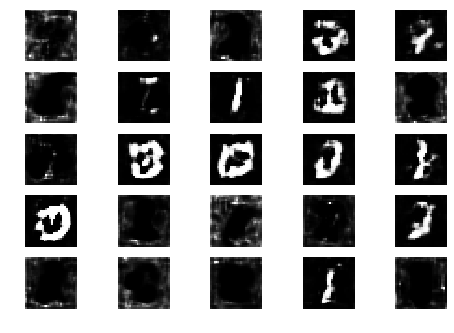

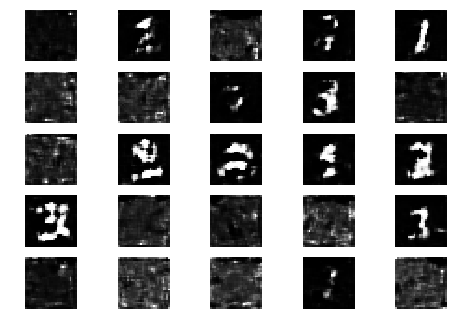

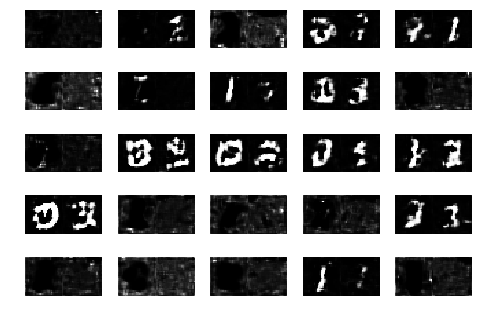

Epoch 0 Batch 601/937 [D loss: 0.785373, acc.: 60.94%] [G loss: 1.375001]
Epoch 0 Batch 602/937 [D loss: 0.663824, acc.: 59.38%] [G loss: 1.149319]
Epoch 0 Batch 603/937 [D loss: 0.559304, acc.: 62.50%] [G loss: 0.864943]
Epoch 0 Batch 604/937 [D loss: 0.571181, acc.: 67.19%] [G loss: 1.366985]
Epoch 0 Batch 605/937 [D loss: 0.564680, acc.: 70.31%] [G loss: 1.302519]
Epoch 0 Batch 606/937 [D loss: 0.797386, acc.: 62.50%] [G loss: 1.140137]
Epoch 0 Batch 607/937 [D loss: 0.646274, acc.: 60.94%] [G loss: 1.165978]
Epoch 0 Batch 608/937 [D loss: 0.940253, acc.: 39.06%] [G loss: 1.070682]
Epoch 0 Batch 609/937 [D loss: 0.547634, acc.: 68.75%] [G loss: 1.159048]
Epoch 0 Batch 610/937 [D loss: 0.635744, acc.: 68.75%] [G loss: 0.991151]
Epoch 0 Batch 611/937 [D loss: 0.613437, acc.: 71.88%] [G loss: 1.097649]
Epoch 0 Batch 612/937 [D loss: 0.656821, acc.: 60.94%] [G loss: 1.034719]
Epoch 0 Batch 613/937 [D loss: 0.575082, acc.: 70.31%] [G loss: 1.254232]
Epoch 0 Batch 614/937 [D loss: 0.68570

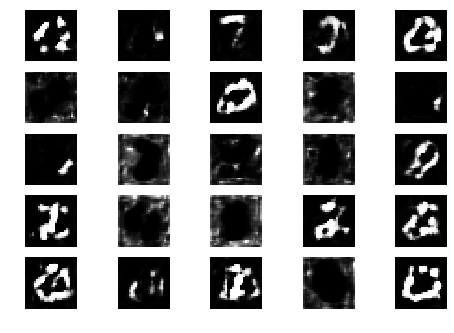

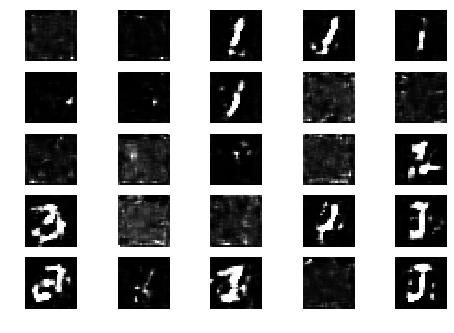

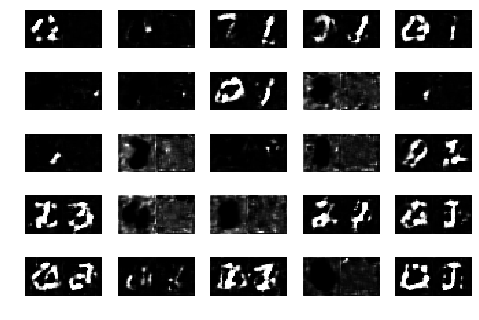

Epoch 0 Batch 701/937 [D loss: 0.587626, acc.: 76.56%] [G loss: 1.159329]
Epoch 0 Batch 702/937 [D loss: 0.586571, acc.: 71.88%] [G loss: 1.110417]
Epoch 0 Batch 703/937 [D loss: 0.832092, acc.: 51.56%] [G loss: 1.150666]
Epoch 0 Batch 704/937 [D loss: 0.593434, acc.: 60.94%] [G loss: 1.171277]
Epoch 0 Batch 705/937 [D loss: 0.684772, acc.: 65.62%] [G loss: 1.191821]
Epoch 0 Batch 706/937 [D loss: 0.816640, acc.: 50.00%] [G loss: 1.409729]
Epoch 0 Batch 707/937 [D loss: 0.665268, acc.: 60.94%] [G loss: 1.326586]
Epoch 0 Batch 708/937 [D loss: 0.574696, acc.: 67.19%] [G loss: 1.224360]
Epoch 0 Batch 709/937 [D loss: 0.745033, acc.: 51.56%] [G loss: 1.225515]
Epoch 0 Batch 710/937 [D loss: 0.920199, acc.: 48.44%] [G loss: 1.342086]
Epoch 0 Batch 711/937 [D loss: 0.614021, acc.: 65.62%] [G loss: 1.543723]
Epoch 0 Batch 712/937 [D loss: 0.772119, acc.: 54.69%] [G loss: 1.126614]
Epoch 0 Batch 713/937 [D loss: 0.684946, acc.: 59.38%] [G loss: 1.258751]
Epoch 0 Batch 714/937 [D loss: 0.84502

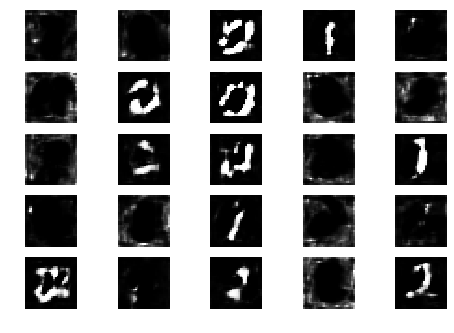

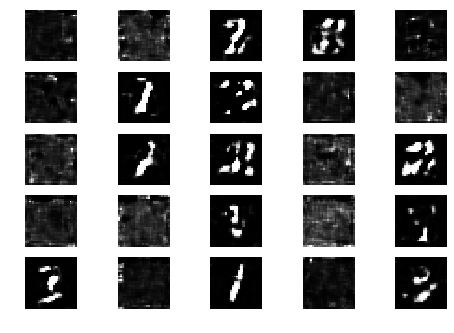

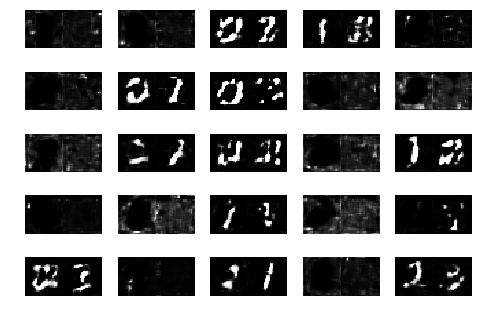

Epoch 0 Batch 801/937 [D loss: 0.608766, acc.: 79.69%] [G loss: 0.813431]
Epoch 0 Batch 802/937 [D loss: 0.812291, acc.: 34.38%] [G loss: 0.973118]
Epoch 0 Batch 803/937 [D loss: 0.473090, acc.: 81.25%] [G loss: 1.197694]
Epoch 0 Batch 804/937 [D loss: 0.617813, acc.: 65.62%] [G loss: 1.136266]
Epoch 0 Batch 805/937 [D loss: 0.707016, acc.: 62.50%] [G loss: 1.001884]
Epoch 0 Batch 806/937 [D loss: 0.661650, acc.: 56.25%] [G loss: 1.271474]
Epoch 0 Batch 807/937 [D loss: 0.560001, acc.: 71.88%] [G loss: 1.040912]
Epoch 0 Batch 808/937 [D loss: 0.585109, acc.: 76.56%] [G loss: 1.300210]
Epoch 0 Batch 809/937 [D loss: 0.579547, acc.: 65.62%] [G loss: 1.279267]
Epoch 0 Batch 810/937 [D loss: 0.687360, acc.: 56.25%] [G loss: 1.164499]
Epoch 0 Batch 811/937 [D loss: 0.635367, acc.: 57.81%] [G loss: 1.166317]
Epoch 0 Batch 812/937 [D loss: 0.554654, acc.: 78.12%] [G loss: 1.081015]
Epoch 0 Batch 813/937 [D loss: 0.746654, acc.: 48.44%] [G loss: 1.132137]
Epoch 0 Batch 814/937 [D loss: 0.67949

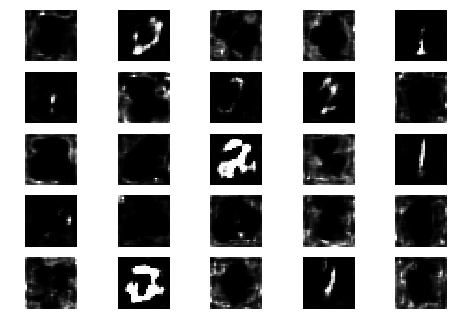

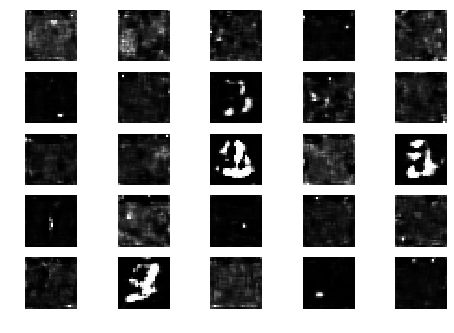

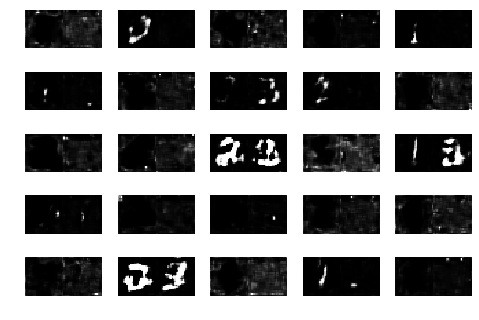

Epoch 0 Batch 901/937 [D loss: 0.664002, acc.: 53.12%] [G loss: 1.254013]
Epoch 0 Batch 902/937 [D loss: 0.786682, acc.: 50.00%] [G loss: 1.006966]
Epoch 0 Batch 903/937 [D loss: 0.686358, acc.: 48.44%] [G loss: 1.048707]
Epoch 0 Batch 904/937 [D loss: 0.669691, acc.: 62.50%] [G loss: 1.145418]
Epoch 0 Batch 905/937 [D loss: 0.576791, acc.: 75.00%] [G loss: 1.542460]
Epoch 0 Batch 906/937 [D loss: 0.658833, acc.: 64.06%] [G loss: 1.377408]
Epoch 0 Batch 907/937 [D loss: 0.725906, acc.: 53.12%] [G loss: 1.261336]
Epoch 0 Batch 908/937 [D loss: 0.655973, acc.: 59.38%] [G loss: 1.343271]
Epoch 0 Batch 909/937 [D loss: 0.740347, acc.: 51.56%] [G loss: 1.205091]
Epoch 0 Batch 910/937 [D loss: 0.748605, acc.: 56.25%] [G loss: 1.160404]
Epoch 0 Batch 911/937 [D loss: 0.668776, acc.: 50.00%] [G loss: 1.295525]
Epoch 0 Batch 912/937 [D loss: 0.628670, acc.: 67.19%] [G loss: 1.258462]
Epoch 0 Batch 913/937 [D loss: 0.740681, acc.: 53.12%] [G loss: 1.239563]
Epoch 0 Batch 914/937 [D loss: 0.58869

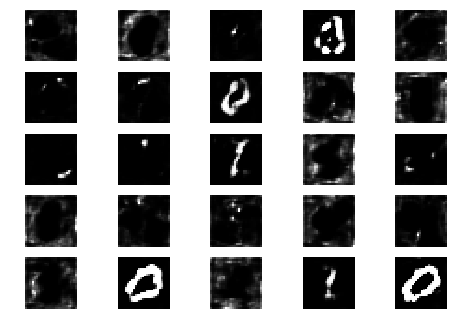

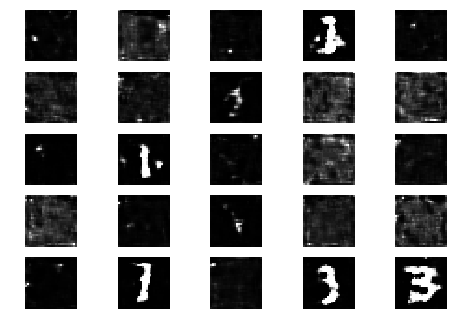

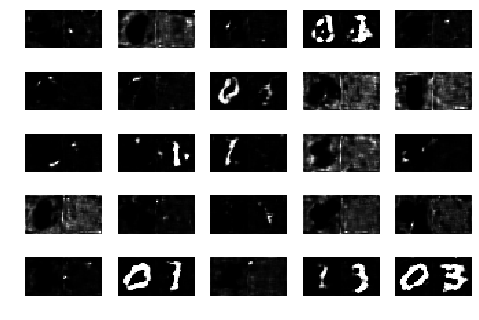

Epoch 1 Batch 1/937 [D loss: 0.618672, acc.: 57.81%] [G loss: 1.271457]
Epoch 1 Batch 2/937 [D loss: 0.535835, acc.: 68.75%] [G loss: 1.426299]
Epoch 1 Batch 3/937 [D loss: 0.671380, acc.: 67.19%] [G loss: 0.929609]
Epoch 1 Batch 4/937 [D loss: 0.692033, acc.: 59.38%] [G loss: 1.277378]
Epoch 1 Batch 5/937 [D loss: 0.732631, acc.: 62.50%] [G loss: 1.002558]
Epoch 1 Batch 6/937 [D loss: 0.484454, acc.: 73.44%] [G loss: 1.349839]
Epoch 1 Batch 7/937 [D loss: 0.666352, acc.: 65.62%] [G loss: 1.091393]
Epoch 1 Batch 8/937 [D loss: 0.707781, acc.: 48.44%] [G loss: 1.060771]
Epoch 1 Batch 9/937 [D loss: 0.666671, acc.: 62.50%] [G loss: 1.006029]
Epoch 1 Batch 10/937 [D loss: 0.650156, acc.: 57.81%] [G loss: 1.277273]
Epoch 1 Batch 11/937 [D loss: 0.708389, acc.: 53.12%] [G loss: 1.125301]
Epoch 1 Batch 12/937 [D loss: 0.730783, acc.: 51.56%] [G loss: 1.388814]
Epoch 1 Batch 13/937 [D loss: 0.602662, acc.: 67.19%] [G loss: 1.070098]
Epoch 1 Batch 14/937 [D loss: 0.627249, acc.: 57.81%] [G los

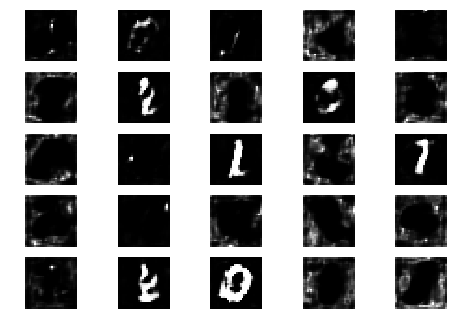

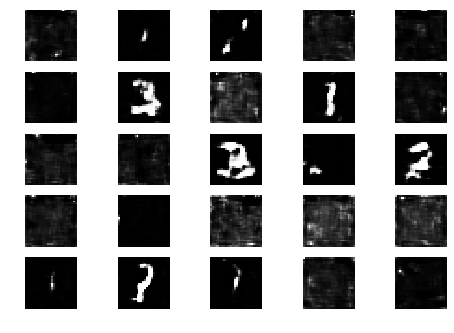

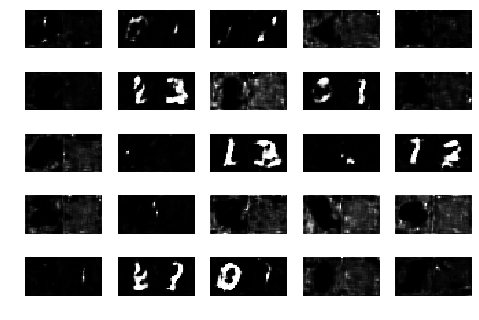

Epoch 1 Batch 101/937 [D loss: 0.620842, acc.: 67.19%] [G loss: 1.267422]
Epoch 1 Batch 102/937 [D loss: 0.634274, acc.: 51.56%] [G loss: 1.228869]
Epoch 1 Batch 103/937 [D loss: 0.703335, acc.: 57.81%] [G loss: 0.929046]
Epoch 1 Batch 104/937 [D loss: 0.717196, acc.: 56.25%] [G loss: 1.102452]
Epoch 1 Batch 105/937 [D loss: 0.541888, acc.: 78.12%] [G loss: 1.323053]
Epoch 1 Batch 106/937 [D loss: 0.658092, acc.: 59.38%] [G loss: 1.324296]
Epoch 1 Batch 107/937 [D loss: 0.599167, acc.: 67.19%] [G loss: 0.892171]
Epoch 1 Batch 108/937 [D loss: 0.768215, acc.: 43.75%] [G loss: 1.138821]
Epoch 1 Batch 109/937 [D loss: 0.604600, acc.: 56.25%] [G loss: 1.192625]
Epoch 1 Batch 110/937 [D loss: 0.743941, acc.: 48.44%] [G loss: 1.212694]
Epoch 1 Batch 111/937 [D loss: 0.600565, acc.: 64.06%] [G loss: 1.165598]
Epoch 1 Batch 112/937 [D loss: 0.517227, acc.: 84.38%] [G loss: 1.203371]
Epoch 1 Batch 113/937 [D loss: 0.823749, acc.: 54.69%] [G loss: 1.078741]
Epoch 1 Batch 114/937 [D loss: 0.69375

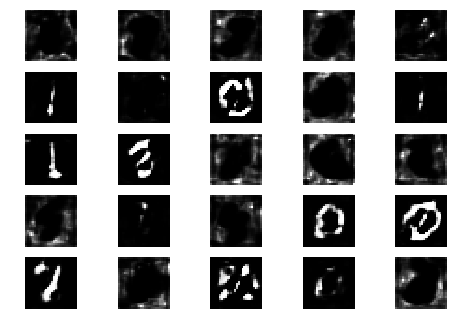

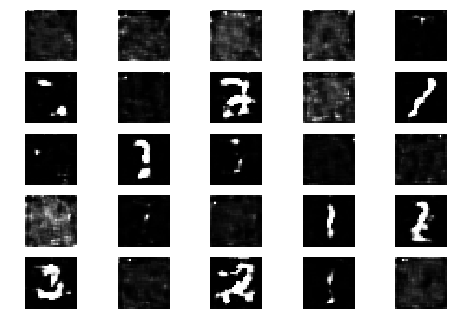

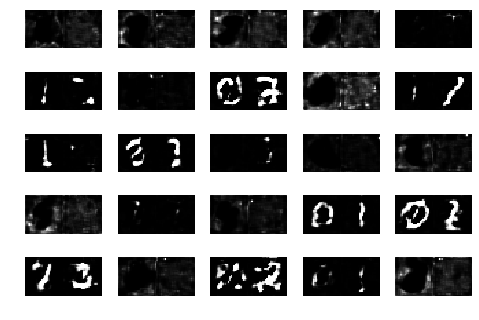

Epoch 1 Batch 201/937 [D loss: 0.639296, acc.: 60.94%] [G loss: 0.840569]
Epoch 1 Batch 202/937 [D loss: 0.650042, acc.: 62.50%] [G loss: 1.191243]
Epoch 1 Batch 203/937 [D loss: 0.758342, acc.: 54.69%] [G loss: 1.128297]
Epoch 1 Batch 204/937 [D loss: 0.602614, acc.: 64.06%] [G loss: 1.159122]
Epoch 1 Batch 205/937 [D loss: 0.770394, acc.: 56.25%] [G loss: 1.021798]
Epoch 1 Batch 206/937 [D loss: 0.654708, acc.: 62.50%] [G loss: 1.244376]
Epoch 1 Batch 207/937 [D loss: 0.776476, acc.: 34.38%] [G loss: 1.235367]
Epoch 1 Batch 208/937 [D loss: 0.732369, acc.: 45.31%] [G loss: 0.985763]
Epoch 1 Batch 209/937 [D loss: 0.718344, acc.: 68.75%] [G loss: 0.889532]
Epoch 1 Batch 210/937 [D loss: 0.695423, acc.: 62.50%] [G loss: 1.046381]
Epoch 1 Batch 211/937 [D loss: 0.647889, acc.: 59.38%] [G loss: 1.188809]
Epoch 1 Batch 212/937 [D loss: 0.619909, acc.: 65.62%] [G loss: 1.277297]
Epoch 1 Batch 213/937 [D loss: 0.567576, acc.: 68.75%] [G loss: 1.221038]
Epoch 1 Batch 214/937 [D loss: 0.67839

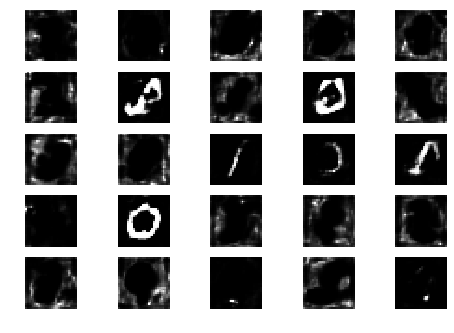

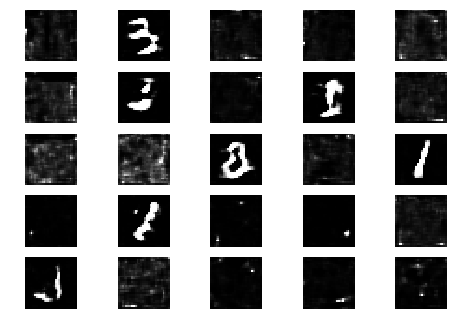

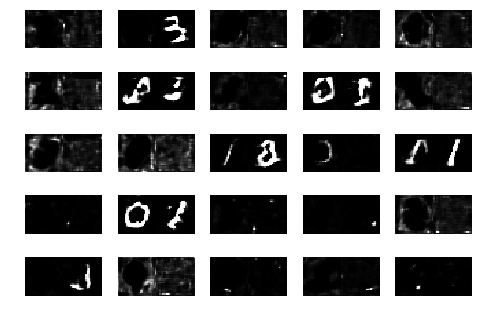

Epoch 1 Batch 301/937 [D loss: 0.614130, acc.: 65.62%] [G loss: 0.958105]
Epoch 1 Batch 302/937 [D loss: 0.608791, acc.: 62.50%] [G loss: 1.298901]
Epoch 1 Batch 303/937 [D loss: 0.651888, acc.: 56.25%] [G loss: 1.137014]
Epoch 1 Batch 304/937 [D loss: 0.546072, acc.: 73.44%] [G loss: 1.200684]
Epoch 1 Batch 305/937 [D loss: 0.652953, acc.: 56.25%] [G loss: 1.168929]
Epoch 1 Batch 306/937 [D loss: 0.643332, acc.: 67.19%] [G loss: 1.323568]
Epoch 1 Batch 307/937 [D loss: 0.639743, acc.: 64.06%] [G loss: 1.480533]
Epoch 1 Batch 308/937 [D loss: 0.714655, acc.: 60.94%] [G loss: 1.168092]
Epoch 1 Batch 309/937 [D loss: 0.627556, acc.: 54.69%] [G loss: 1.272066]
Epoch 1 Batch 310/937 [D loss: 0.768434, acc.: 59.38%] [G loss: 1.560793]
Epoch 1 Batch 311/937 [D loss: 0.759776, acc.: 57.81%] [G loss: 1.158849]
Epoch 1 Batch 312/937 [D loss: 0.629605, acc.: 70.31%] [G loss: 0.959535]
Epoch 1 Batch 313/937 [D loss: 0.664775, acc.: 60.94%] [G loss: 1.042552]
Epoch 1 Batch 314/937 [D loss: 0.72261

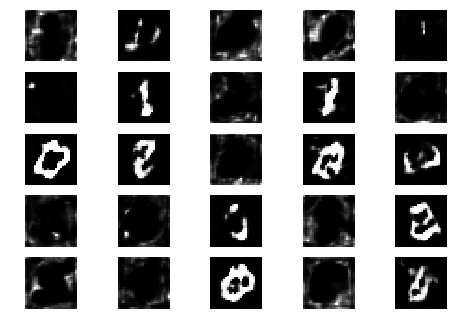

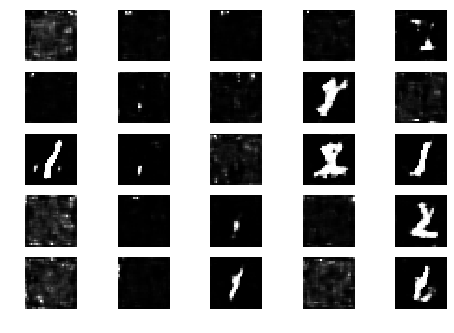

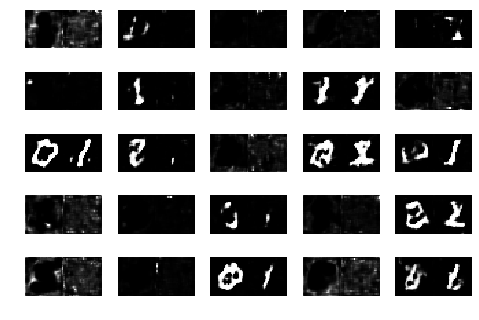

Epoch 1 Batch 401/937 [D loss: 0.771270, acc.: 42.19%] [G loss: 1.418182]
Epoch 1 Batch 402/937 [D loss: 0.588423, acc.: 71.88%] [G loss: 1.396415]
Epoch 1 Batch 403/937 [D loss: 0.900348, acc.: 31.25%] [G loss: 1.248279]
Epoch 1 Batch 404/937 [D loss: 0.476928, acc.: 84.38%] [G loss: 0.995720]
Epoch 1 Batch 405/937 [D loss: 0.615625, acc.: 68.75%] [G loss: 1.117192]
Epoch 1 Batch 406/937 [D loss: 0.697152, acc.: 56.25%] [G loss: 1.347594]
Epoch 1 Batch 407/937 [D loss: 0.706101, acc.: 56.25%] [G loss: 0.997696]
Epoch 1 Batch 408/937 [D loss: 0.679916, acc.: 50.00%] [G loss: 1.234408]
Epoch 1 Batch 409/937 [D loss: 0.643052, acc.: 64.06%] [G loss: 1.266198]
Epoch 1 Batch 410/937 [D loss: 0.745834, acc.: 51.56%] [G loss: 1.342055]
Epoch 1 Batch 411/937 [D loss: 0.587788, acc.: 67.19%] [G loss: 1.130970]
Epoch 1 Batch 412/937 [D loss: 0.588799, acc.: 67.19%] [G loss: 1.242210]
Epoch 1 Batch 413/937 [D loss: 0.914614, acc.: 39.06%] [G loss: 0.989420]
Epoch 1 Batch 414/937 [D loss: 0.46434

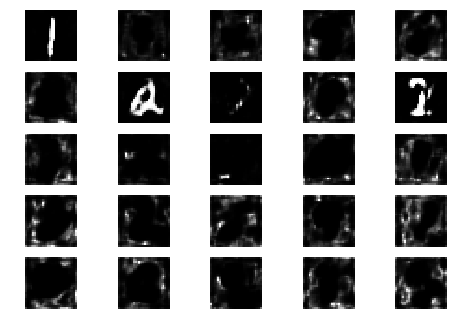

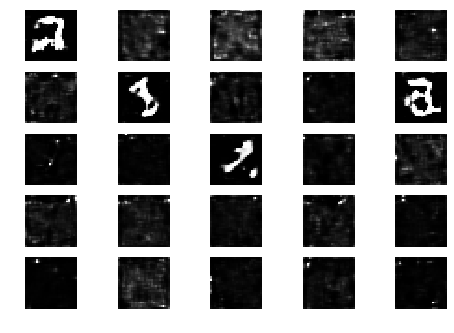

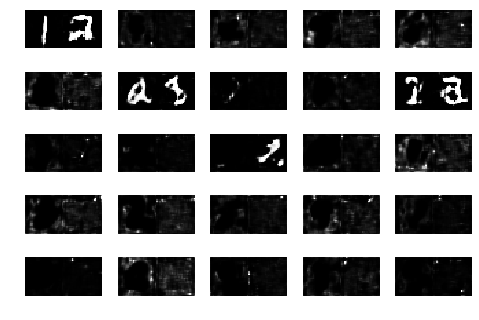

Epoch 1 Batch 501/937 [D loss: 0.700271, acc.: 67.19%] [G loss: 1.266150]
Epoch 1 Batch 502/937 [D loss: 0.930970, acc.: 35.94%] [G loss: 1.082798]
Epoch 1 Batch 503/937 [D loss: 0.633130, acc.: 62.50%] [G loss: 1.181874]
Epoch 1 Batch 504/937 [D loss: 0.617441, acc.: 70.31%] [G loss: 1.316497]
Epoch 1 Batch 505/937 [D loss: 0.604943, acc.: 67.19%] [G loss: 1.286842]
Epoch 1 Batch 506/937 [D loss: 0.602246, acc.: 64.06%] [G loss: 1.244059]
Epoch 1 Batch 507/937 [D loss: 0.686923, acc.: 57.81%] [G loss: 1.112811]
Epoch 1 Batch 508/937 [D loss: 0.477214, acc.: 78.12%] [G loss: 1.042712]
Epoch 1 Batch 509/937 [D loss: 0.579661, acc.: 68.75%] [G loss: 1.177346]
Epoch 1 Batch 510/937 [D loss: 0.751864, acc.: 46.88%] [G loss: 1.179935]
Epoch 1 Batch 511/937 [D loss: 0.549787, acc.: 73.44%] [G loss: 1.331881]
Epoch 1 Batch 512/937 [D loss: 0.625155, acc.: 65.62%] [G loss: 1.042560]
Epoch 1 Batch 513/937 [D loss: 0.474364, acc.: 85.94%] [G loss: 1.043389]
Epoch 1 Batch 514/937 [D loss: 0.80357

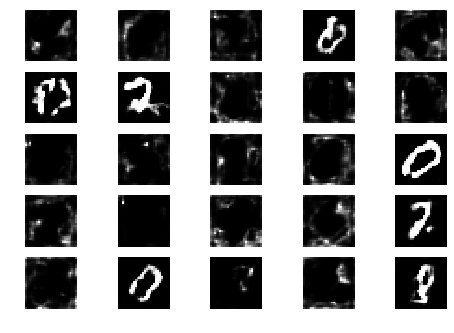

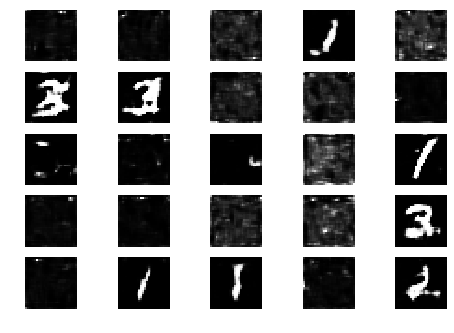

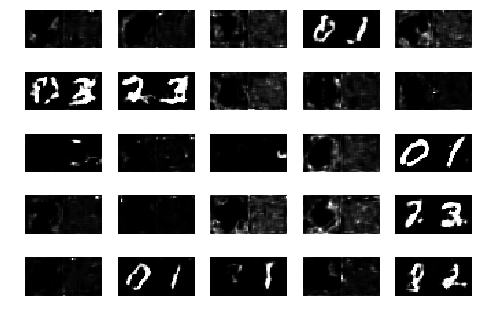

Epoch 1 Batch 601/937 [D loss: 0.671356, acc.: 59.38%] [G loss: 1.109933]
Epoch 1 Batch 602/937 [D loss: 0.473888, acc.: 85.94%] [G loss: 1.418665]
Epoch 1 Batch 603/937 [D loss: 0.606776, acc.: 62.50%] [G loss: 1.182143]
Epoch 1 Batch 604/937 [D loss: 0.641857, acc.: 65.62%] [G loss: 1.216436]
Epoch 1 Batch 605/937 [D loss: 0.674021, acc.: 57.81%] [G loss: 1.068202]
Epoch 1 Batch 606/937 [D loss: 0.648207, acc.: 57.81%] [G loss: 1.076593]
Epoch 1 Batch 607/937 [D loss: 0.607736, acc.: 64.06%] [G loss: 0.964668]
Epoch 1 Batch 608/937 [D loss: 0.828535, acc.: 28.12%] [G loss: 1.195875]
Epoch 1 Batch 609/937 [D loss: 0.670470, acc.: 53.12%] [G loss: 1.299807]
Epoch 1 Batch 610/937 [D loss: 0.646317, acc.: 59.38%] [G loss: 1.111773]
Epoch 1 Batch 611/937 [D loss: 0.803385, acc.: 60.94%] [G loss: 1.229201]
Epoch 1 Batch 612/937 [D loss: 0.783692, acc.: 46.88%] [G loss: 0.770199]
Epoch 1 Batch 613/937 [D loss: 0.583317, acc.: 67.19%] [G loss: 1.045765]
Epoch 1 Batch 614/937 [D loss: 0.59103

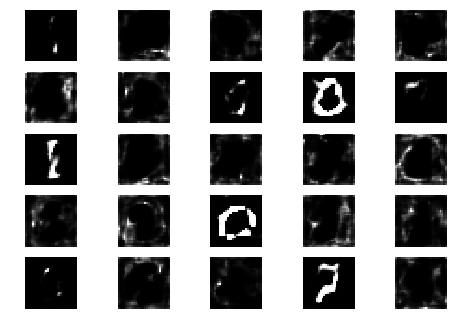

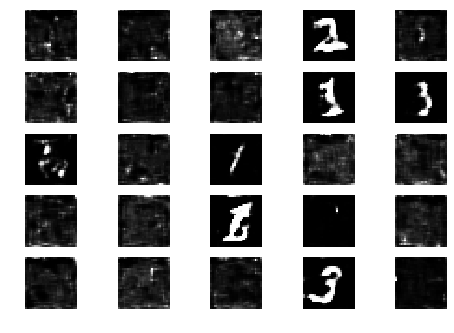

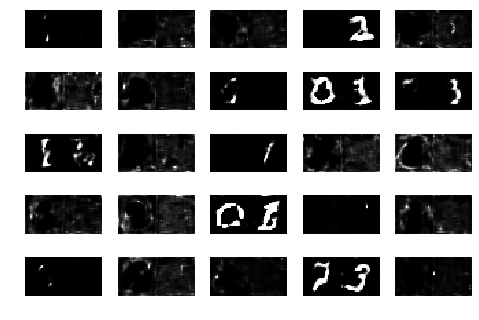

Epoch 1 Batch 701/937 [D loss: 0.815323, acc.: 51.56%] [G loss: 1.046383]
Epoch 1 Batch 702/937 [D loss: 0.562112, acc.: 75.00%] [G loss: 0.929338]
Epoch 1 Batch 703/937 [D loss: 0.401710, acc.: 79.69%] [G loss: 0.833810]
Epoch 1 Batch 704/937 [D loss: 0.798238, acc.: 53.12%] [G loss: 1.075339]
Epoch 1 Batch 705/937 [D loss: 0.649253, acc.: 54.69%] [G loss: 1.271977]
Epoch 1 Batch 706/937 [D loss: 0.587377, acc.: 59.38%] [G loss: 1.120503]
Epoch 1 Batch 707/937 [D loss: 0.525976, acc.: 79.69%] [G loss: 1.186940]
Epoch 1 Batch 708/937 [D loss: 0.583883, acc.: 68.75%] [G loss: 1.186712]
Epoch 1 Batch 709/937 [D loss: 0.974757, acc.: 18.75%] [G loss: 1.292639]
Epoch 1 Batch 710/937 [D loss: 0.566319, acc.: 73.44%] [G loss: 1.101290]
Epoch 1 Batch 711/937 [D loss: 0.701336, acc.: 59.38%] [G loss: 1.230874]
Epoch 1 Batch 712/937 [D loss: 0.634358, acc.: 76.56%] [G loss: 1.290271]
Epoch 1 Batch 713/937 [D loss: 0.775334, acc.: 48.44%] [G loss: 1.451431]
Epoch 1 Batch 714/937 [D loss: 0.57733

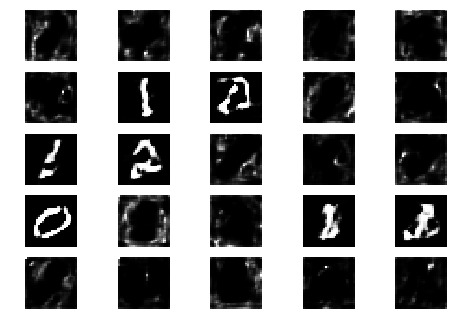

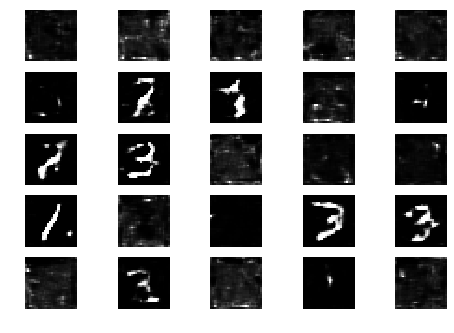

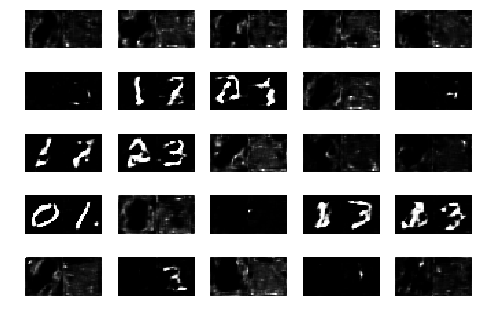

Epoch 1 Batch 801/937 [D loss: 0.592107, acc.: 60.94%] [G loss: 1.151573]
Epoch 1 Batch 802/937 [D loss: 0.726394, acc.: 56.25%] [G loss: 1.270637]
Epoch 1 Batch 803/937 [D loss: 0.616951, acc.: 64.06%] [G loss: 1.246397]
Epoch 1 Batch 804/937 [D loss: 0.684536, acc.: 59.38%] [G loss: 1.527903]
Epoch 1 Batch 805/937 [D loss: 0.546804, acc.: 73.44%] [G loss: 1.158594]
Epoch 1 Batch 806/937 [D loss: 0.649118, acc.: 64.06%] [G loss: 1.515670]
Epoch 1 Batch 807/937 [D loss: 0.627647, acc.: 65.62%] [G loss: 1.255528]
Epoch 1 Batch 808/937 [D loss: 0.581825, acc.: 70.31%] [G loss: 1.373879]
Epoch 1 Batch 809/937 [D loss: 0.498795, acc.: 82.81%] [G loss: 1.290045]
Epoch 1 Batch 810/937 [D loss: 0.643390, acc.: 57.81%] [G loss: 1.275442]
Epoch 1 Batch 811/937 [D loss: 0.537409, acc.: 73.44%] [G loss: 1.110952]
Epoch 1 Batch 812/937 [D loss: 0.615324, acc.: 62.50%] [G loss: 1.135895]
Epoch 1 Batch 813/937 [D loss: 0.556605, acc.: 70.31%] [G loss: 0.862003]
Epoch 1 Batch 814/937 [D loss: 0.57504

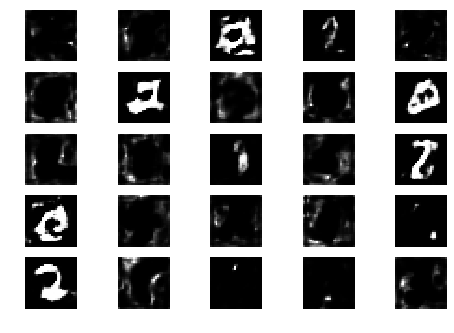

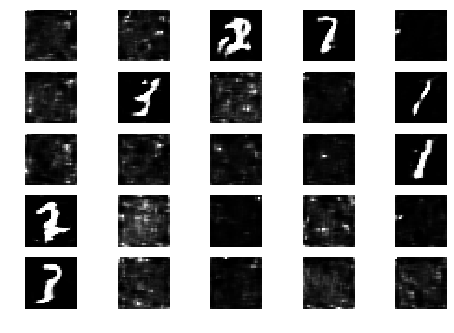

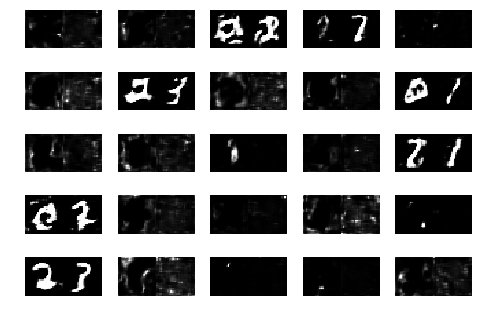

Epoch 1 Batch 901/937 [D loss: 0.624113, acc.: 75.00%] [G loss: 1.077185]
Epoch 1 Batch 902/937 [D loss: 0.691948, acc.: 54.69%] [G loss: 1.295380]
Epoch 1 Batch 903/937 [D loss: 0.692118, acc.: 54.69%] [G loss: 1.389600]
Epoch 1 Batch 904/937 [D loss: 0.472400, acc.: 78.12%] [G loss: 1.116986]
Epoch 1 Batch 905/937 [D loss: 0.618313, acc.: 59.38%] [G loss: 1.257990]
Epoch 1 Batch 906/937 [D loss: 0.843116, acc.: 39.06%] [G loss: 1.286391]
Epoch 1 Batch 907/937 [D loss: 0.471418, acc.: 78.12%] [G loss: 1.063505]
Epoch 1 Batch 908/937 [D loss: 0.697129, acc.: 54.69%] [G loss: 1.374353]
Epoch 1 Batch 909/937 [D loss: 0.706644, acc.: 62.50%] [G loss: 1.152057]
Epoch 1 Batch 910/937 [D loss: 0.760484, acc.: 51.56%] [G loss: 1.002471]
Epoch 1 Batch 911/937 [D loss: 0.702372, acc.: 59.38%] [G loss: 1.183637]
Epoch 1 Batch 912/937 [D loss: 0.608737, acc.: 59.38%] [G loss: 1.100167]
Epoch 1 Batch 913/937 [D loss: 0.533050, acc.: 68.75%] [G loss: 1.253421]
Epoch 1 Batch 914/937 [D loss: 0.69904

In [33]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=1, modeltotrain = 3)

Number of examples:  60000
Number of Batches:  937
Number of epochs:  1
noise half batch
[[ 0.23268643 -0.36351973  0.68324786 ...  1.50637642 -0.43500789
  -1.32637376]
 [ 0.55790308 -0.06225117 -0.15512893 ...  0.27489339  0.785246
  -0.59312038]
 [ 0.35677609  0.86851673  0.5264353  ... -0.68877873 -0.61531809
   0.43159232]
 ...
 [-1.16889862 -0.07441529  1.26239208 ... -0.52745114  1.01860352
  -1.32122602]
 [-0.28713461 -0.8841919   0.9510448  ... -0.71816174 -0.85787247
  -0.19590797]
 [-1.2120752   2.21383454  1.32526373 ...  0.3600857   0.50914668
   1.4436572 ]]
G1 output numpy array shape
(32, 28, 28, 1)
G1+G2 appended numpy array shape
(32, 28, 56, 1)
real images
(32, 28, 56, 1)
Epoch 0 Batch 0/937 [D loss: 0.394855, acc.: 87.50%] [G loss: 1.063635]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


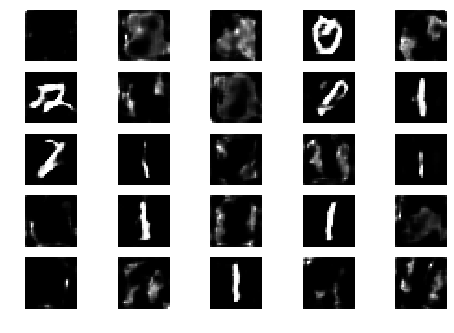

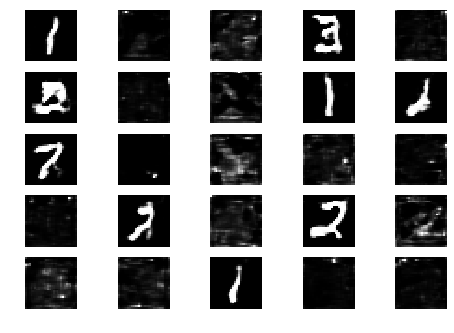

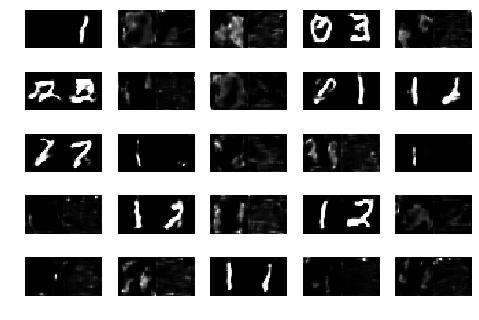

Epoch 0 Batch 1/937 [D loss: 0.583866, acc.: 71.88%] [G loss: 1.721949]
Epoch 0 Batch 2/937 [D loss: 0.587819, acc.: 68.75%] [G loss: 1.173581]
Epoch 0 Batch 3/937 [D loss: 0.558571, acc.: 76.56%] [G loss: 1.131930]
Epoch 0 Batch 4/937 [D loss: 0.598440, acc.: 70.31%] [G loss: 1.570158]
Epoch 0 Batch 5/937 [D loss: 0.599148, acc.: 65.62%] [G loss: 1.554320]
Epoch 0 Batch 6/937 [D loss: 0.612025, acc.: 73.44%] [G loss: 1.174038]
Epoch 0 Batch 7/937 [D loss: 0.452140, acc.: 82.81%] [G loss: 1.954420]
Epoch 0 Batch 8/937 [D loss: 0.707627, acc.: 56.25%] [G loss: 1.851930]
Epoch 0 Batch 9/937 [D loss: 0.768928, acc.: 48.44%] [G loss: 1.238614]
Epoch 0 Batch 10/937 [D loss: 0.466380, acc.: 81.25%] [G loss: 1.256095]
Epoch 0 Batch 11/937 [D loss: 0.573331, acc.: 71.88%] [G loss: 1.504393]
Epoch 0 Batch 12/937 [D loss: 0.380499, acc.: 81.25%] [G loss: 1.112097]
Epoch 0 Batch 13/937 [D loss: 0.561226, acc.: 73.44%] [G loss: 1.066714]
Epoch 0 Batch 14/937 [D loss: 0.578951, acc.: 73.44%] [G los

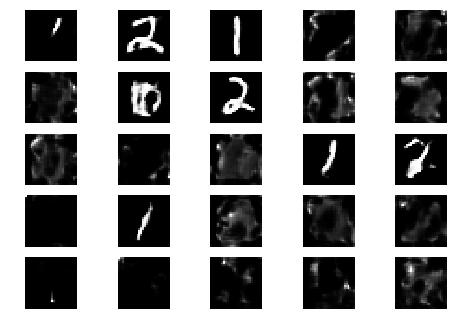

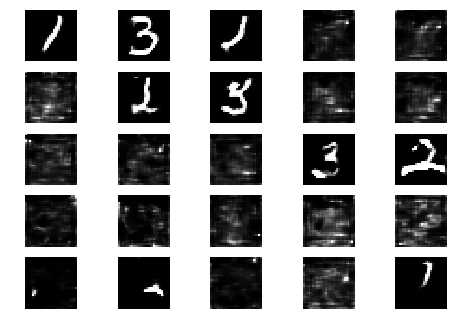

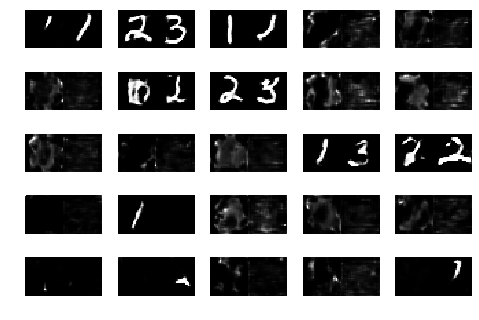

Epoch 0 Batch 101/937 [D loss: 0.628946, acc.: 56.25%] [G loss: 1.980992]
Epoch 0 Batch 102/937 [D loss: 0.685436, acc.: 60.94%] [G loss: 1.070267]
Epoch 0 Batch 103/937 [D loss: 0.629342, acc.: 73.44%] [G loss: 1.451755]
Epoch 0 Batch 104/937 [D loss: 0.599757, acc.: 68.75%] [G loss: 1.810693]
Epoch 0 Batch 105/937 [D loss: 0.530378, acc.: 75.00%] [G loss: 1.809497]
Epoch 0 Batch 106/937 [D loss: 0.396954, acc.: 89.06%] [G loss: 1.406444]
Epoch 0 Batch 107/937 [D loss: 0.667711, acc.: 67.19%] [G loss: 1.014290]
Epoch 0 Batch 108/937 [D loss: 0.492238, acc.: 75.00%] [G loss: 1.896152]
Epoch 0 Batch 109/937 [D loss: 0.773331, acc.: 53.12%] [G loss: 1.806287]
Epoch 0 Batch 110/937 [D loss: 0.450780, acc.: 82.81%] [G loss: 1.685562]
Epoch 0 Batch 111/937 [D loss: 0.815598, acc.: 53.12%] [G loss: 1.303288]
Epoch 0 Batch 112/937 [D loss: 0.542925, acc.: 70.31%] [G loss: 1.212077]
Epoch 0 Batch 113/937 [D loss: 0.725133, acc.: 57.81%] [G loss: 1.372604]
Epoch 0 Batch 114/937 [D loss: 0.64378

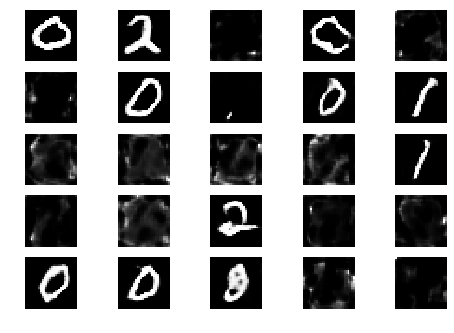

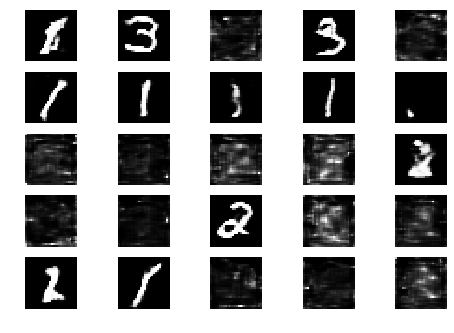

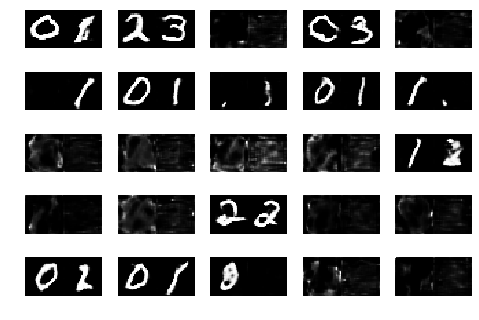

Epoch 0 Batch 201/937 [D loss: 0.678738, acc.: 59.38%] [G loss: 1.495354]
Epoch 0 Batch 202/937 [D loss: 0.685847, acc.: 54.69%] [G loss: 0.969799]
Epoch 0 Batch 203/937 [D loss: 0.715757, acc.: 56.25%] [G loss: 1.501184]
Epoch 0 Batch 204/937 [D loss: 0.561577, acc.: 75.00%] [G loss: 1.496445]
Epoch 0 Batch 205/937 [D loss: 0.590712, acc.: 67.19%] [G loss: 1.332149]
Epoch 0 Batch 206/937 [D loss: 0.726833, acc.: 54.69%] [G loss: 1.947554]
Epoch 0 Batch 207/937 [D loss: 0.792078, acc.: 48.44%] [G loss: 1.401085]
Epoch 0 Batch 208/937 [D loss: 0.632487, acc.: 56.25%] [G loss: 1.356635]
Epoch 0 Batch 209/937 [D loss: 0.544912, acc.: 76.56%] [G loss: 0.888289]
Epoch 0 Batch 210/937 [D loss: 0.463248, acc.: 76.56%] [G loss: 1.482504]
Epoch 0 Batch 211/937 [D loss: 0.615547, acc.: 62.50%] [G loss: 1.258923]
Epoch 0 Batch 212/937 [D loss: 0.758119, acc.: 42.19%] [G loss: 1.311991]
Epoch 0 Batch 213/937 [D loss: 0.545320, acc.: 71.88%] [G loss: 1.204374]
Epoch 0 Batch 214/937 [D loss: 0.65795

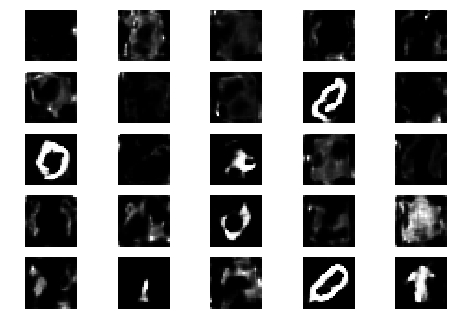

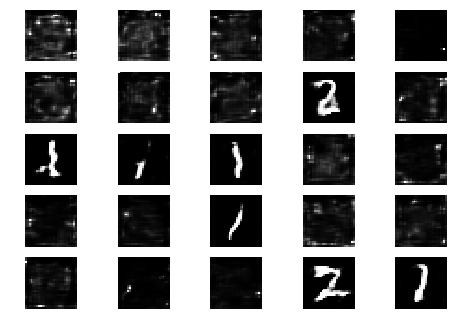

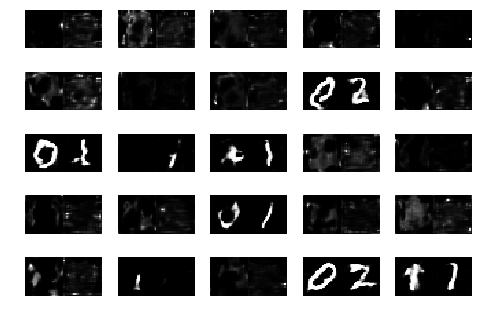

Epoch 0 Batch 301/937 [D loss: 0.707740, acc.: 62.50%] [G loss: 2.051776]
Epoch 0 Batch 302/937 [D loss: 0.584209, acc.: 71.88%] [G loss: 1.792522]
Epoch 0 Batch 303/937 [D loss: 0.795301, acc.: 45.31%] [G loss: 0.944474]
Epoch 0 Batch 304/937 [D loss: 0.637071, acc.: 68.75%] [G loss: 1.458272]
Epoch 0 Batch 305/937 [D loss: 0.786829, acc.: 40.62%] [G loss: 1.409108]
Epoch 0 Batch 306/937 [D loss: 0.608529, acc.: 71.88%] [G loss: 1.635978]
Epoch 0 Batch 307/937 [D loss: 0.498762, acc.: 79.69%] [G loss: 1.775203]
Epoch 0 Batch 308/937 [D loss: 0.489019, acc.: 70.31%] [G loss: 1.367779]
Epoch 0 Batch 309/937 [D loss: 0.792425, acc.: 39.06%] [G loss: 1.448324]
Epoch 0 Batch 310/937 [D loss: 0.386403, acc.: 89.06%] [G loss: 1.693913]
Epoch 0 Batch 311/937 [D loss: 0.861668, acc.: 54.69%] [G loss: 1.564906]
Epoch 0 Batch 312/937 [D loss: 0.443001, acc.: 84.38%] [G loss: 1.157992]
Epoch 0 Batch 313/937 [D loss: 0.548783, acc.: 73.44%] [G loss: 1.225472]
Epoch 0 Batch 314/937 [D loss: 0.63471

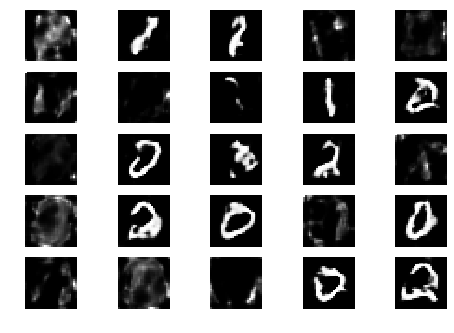

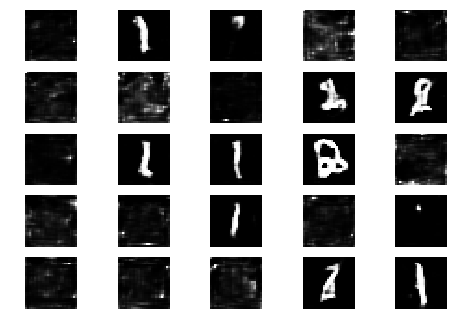

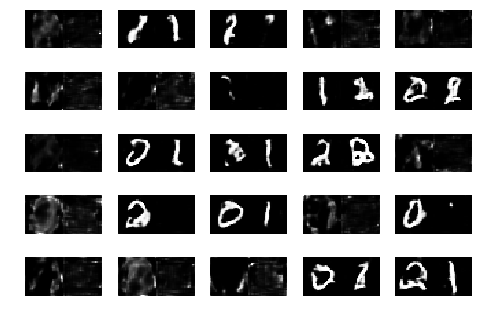

Epoch 0 Batch 401/937 [D loss: 0.590337, acc.: 65.62%] [G loss: 1.735142]
Epoch 0 Batch 402/937 [D loss: 0.538393, acc.: 78.12%] [G loss: 1.942025]
Epoch 0 Batch 403/937 [D loss: 0.861556, acc.: 45.31%] [G loss: 1.987185]
Epoch 0 Batch 404/937 [D loss: 0.772342, acc.: 37.50%] [G loss: 0.921906]
Epoch 0 Batch 405/937 [D loss: 0.760974, acc.: 40.62%] [G loss: 1.605829]
Epoch 0 Batch 406/937 [D loss: 0.690239, acc.: 51.56%] [G loss: 1.129181]
Epoch 0 Batch 407/937 [D loss: 0.533684, acc.: 75.00%] [G loss: 1.114391]
Epoch 0 Batch 408/937 [D loss: 0.573617, acc.: 76.56%] [G loss: 1.669828]
Epoch 0 Batch 409/937 [D loss: 0.459312, acc.: 81.25%] [G loss: 1.625265]
Epoch 0 Batch 410/937 [D loss: 0.528734, acc.: 78.12%] [G loss: 1.404779]
Epoch 0 Batch 411/937 [D loss: 0.430160, acc.: 82.81%] [G loss: 1.342670]
Epoch 0 Batch 412/937 [D loss: 0.444984, acc.: 82.81%] [G loss: 1.921653]
Epoch 0 Batch 413/937 [D loss: 0.594359, acc.: 68.75%] [G loss: 1.696203]
Epoch 0 Batch 414/937 [D loss: 0.66307

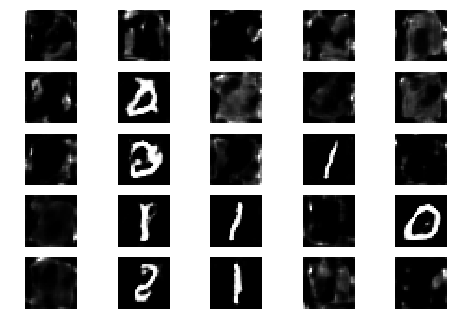

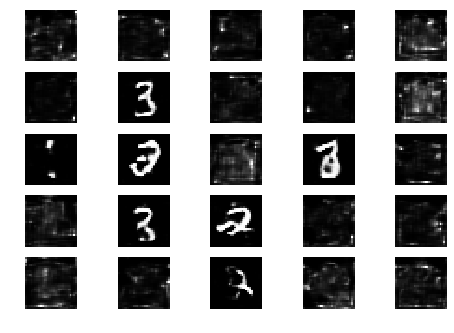

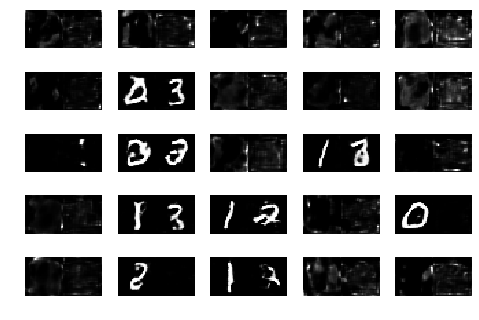

Epoch 0 Batch 501/937 [D loss: 0.646612, acc.: 68.75%] [G loss: 1.136117]
Epoch 0 Batch 502/937 [D loss: 0.908991, acc.: 50.00%] [G loss: 1.210987]
Epoch 0 Batch 503/937 [D loss: 0.515787, acc.: 78.12%] [G loss: 1.774855]
Epoch 0 Batch 504/937 [D loss: 0.579386, acc.: 68.75%] [G loss: 1.564340]
Epoch 0 Batch 505/937 [D loss: 0.493835, acc.: 78.12%] [G loss: 1.530063]
Epoch 0 Batch 506/937 [D loss: 0.569845, acc.: 76.56%] [G loss: 1.382167]
Epoch 0 Batch 507/937 [D loss: 0.489892, acc.: 79.69%] [G loss: 1.980683]
Epoch 0 Batch 508/937 [D loss: 0.486562, acc.: 76.56%] [G loss: 1.525221]
Epoch 0 Batch 509/937 [D loss: 0.396182, acc.: 90.62%] [G loss: 1.710663]
Epoch 0 Batch 510/937 [D loss: 0.602824, acc.: 70.31%] [G loss: 1.897512]
Epoch 0 Batch 511/937 [D loss: 0.603595, acc.: 78.12%] [G loss: 1.516001]
Epoch 0 Batch 512/937 [D loss: 0.491561, acc.: 76.56%] [G loss: 1.264100]
Epoch 0 Batch 513/937 [D loss: 0.608235, acc.: 65.62%] [G loss: 1.061610]
Epoch 0 Batch 514/937 [D loss: 0.45028

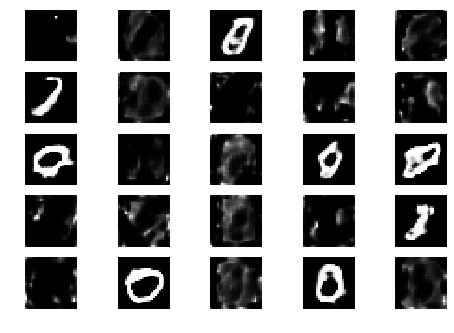

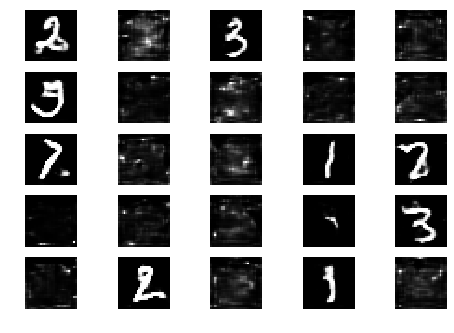

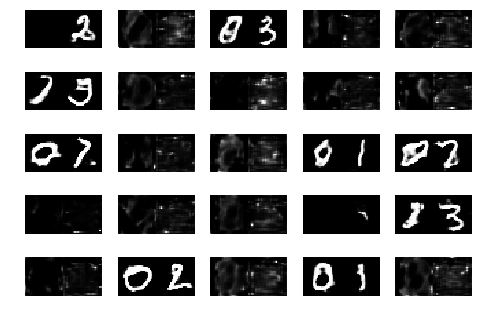

Epoch 0 Batch 601/937 [D loss: 0.632978, acc.: 68.75%] [G loss: 1.134117]
Epoch 0 Batch 602/937 [D loss: 0.464354, acc.: 84.38%] [G loss: 1.272236]
Epoch 0 Batch 603/937 [D loss: 0.579577, acc.: 68.75%] [G loss: 1.356075]
Epoch 0 Batch 604/937 [D loss: 0.469694, acc.: 73.44%] [G loss: 1.527688]
Epoch 0 Batch 605/937 [D loss: 0.439051, acc.: 81.25%] [G loss: 1.253605]
Epoch 0 Batch 606/937 [D loss: 0.477971, acc.: 78.12%] [G loss: 0.946027]
Epoch 0 Batch 607/937 [D loss: 0.451511, acc.: 84.38%] [G loss: 1.132252]
Epoch 0 Batch 608/937 [D loss: 0.551386, acc.: 71.88%] [G loss: 1.739413]
Epoch 0 Batch 609/937 [D loss: 0.557872, acc.: 64.06%] [G loss: 1.484696]
Epoch 0 Batch 610/937 [D loss: 0.477288, acc.: 87.50%] [G loss: 1.432421]
Epoch 0 Batch 611/937 [D loss: 0.595525, acc.: 59.38%] [G loss: 1.149459]
Epoch 0 Batch 612/937 [D loss: 0.474440, acc.: 84.38%] [G loss: 1.718176]
Epoch 0 Batch 613/937 [D loss: 0.461830, acc.: 81.25%] [G loss: 1.599205]
Epoch 0 Batch 614/937 [D loss: 0.47541

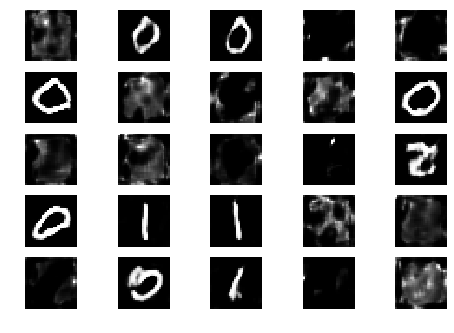

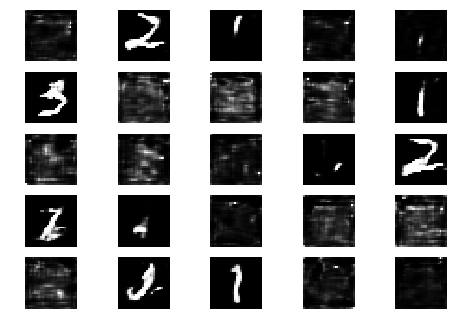

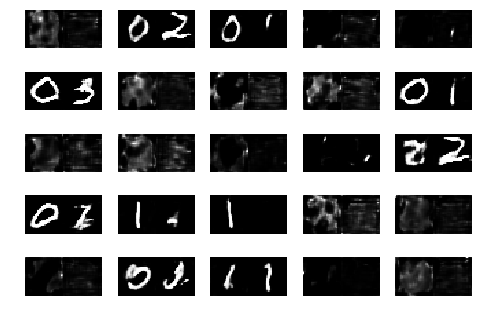

Epoch 0 Batch 701/937 [D loss: 0.831521, acc.: 59.38%] [G loss: 1.700123]
Epoch 0 Batch 702/937 [D loss: 0.516216, acc.: 71.88%] [G loss: 1.955680]
Epoch 0 Batch 703/937 [D loss: 0.552426, acc.: 73.44%] [G loss: 1.829707]
Epoch 0 Batch 704/937 [D loss: 0.694350, acc.: 54.69%] [G loss: 1.288406]
Epoch 0 Batch 705/937 [D loss: 0.439480, acc.: 84.38%] [G loss: 1.774040]
Epoch 0 Batch 706/937 [D loss: 0.694318, acc.: 59.38%] [G loss: 0.979762]
Epoch 0 Batch 707/937 [D loss: 0.570687, acc.: 65.62%] [G loss: 1.197961]
Epoch 0 Batch 708/937 [D loss: 0.595700, acc.: 65.62%] [G loss: 1.342106]
Epoch 0 Batch 709/937 [D loss: 0.525744, acc.: 75.00%] [G loss: 1.248226]
Epoch 0 Batch 710/937 [D loss: 0.570493, acc.: 73.44%] [G loss: 1.846821]
Epoch 0 Batch 711/937 [D loss: 0.342462, acc.: 89.06%] [G loss: 1.180573]
Epoch 0 Batch 712/937 [D loss: 0.838140, acc.: 42.19%] [G loss: 1.071569]
Epoch 0 Batch 713/937 [D loss: 0.810654, acc.: 46.88%] [G loss: 1.153635]
Epoch 0 Batch 714/937 [D loss: 0.42401

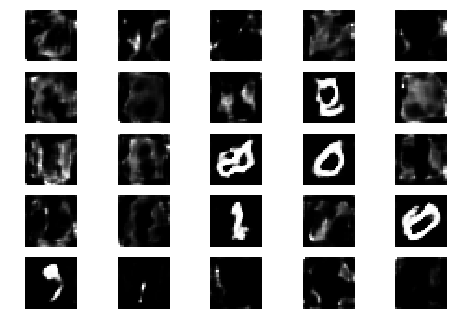

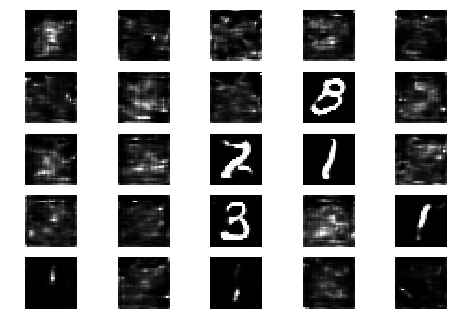

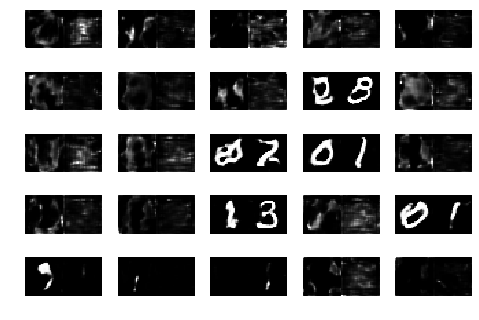

Epoch 0 Batch 801/937 [D loss: 0.541967, acc.: 67.19%] [G loss: 1.431452]
Epoch 0 Batch 802/937 [D loss: 0.396461, acc.: 90.62%] [G loss: 1.254274]
Epoch 0 Batch 803/937 [D loss: 0.471523, acc.: 78.12%] [G loss: 1.184036]
Epoch 0 Batch 804/937 [D loss: 0.841536, acc.: 48.44%] [G loss: 1.271686]
Epoch 0 Batch 805/937 [D loss: 0.645368, acc.: 65.62%] [G loss: 1.891021]
Epoch 0 Batch 806/937 [D loss: 0.623307, acc.: 62.50%] [G loss: 1.874672]
Epoch 0 Batch 807/937 [D loss: 0.438092, acc.: 73.44%] [G loss: 1.514275]
Epoch 0 Batch 808/937 [D loss: 0.960059, acc.: 53.12%] [G loss: 1.164828]
Epoch 0 Batch 809/937 [D loss: 0.508330, acc.: 82.81%] [G loss: 1.539975]
Epoch 0 Batch 810/937 [D loss: 0.632925, acc.: 62.50%] [G loss: 2.081149]
Epoch 0 Batch 811/937 [D loss: 0.774108, acc.: 54.69%] [G loss: 1.607052]
Epoch 0 Batch 812/937 [D loss: 0.532413, acc.: 67.19%] [G loss: 1.172461]
Epoch 0 Batch 813/937 [D loss: 0.533370, acc.: 73.44%] [G loss: 1.784965]
Epoch 0 Batch 814/937 [D loss: 0.71109

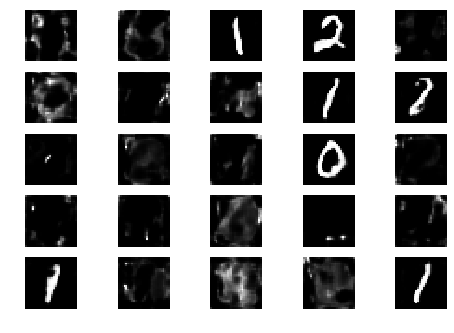

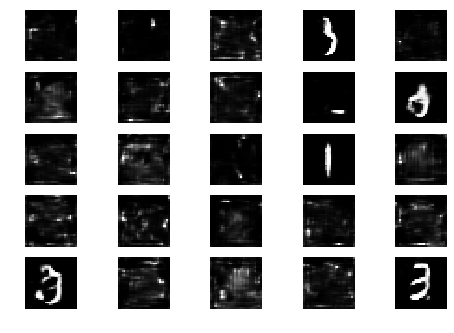

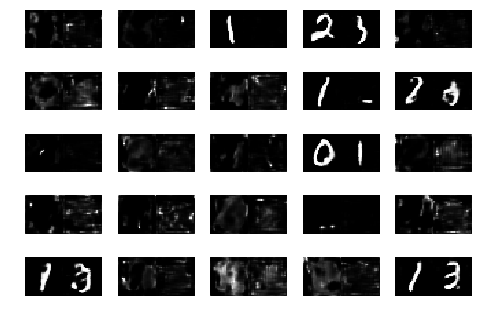

Epoch 0 Batch 901/937 [D loss: 0.411587, acc.: 85.94%] [G loss: 1.577347]
Epoch 0 Batch 902/937 [D loss: 0.367508, acc.: 89.06%] [G loss: 1.647474]
Epoch 0 Batch 903/937 [D loss: 0.725793, acc.: 62.50%] [G loss: 2.454958]
Epoch 0 Batch 904/937 [D loss: 0.751211, acc.: 53.12%] [G loss: 1.160552]
Epoch 0 Batch 905/937 [D loss: 0.520447, acc.: 71.88%] [G loss: 2.025565]
Epoch 0 Batch 906/937 [D loss: 0.397263, acc.: 87.50%] [G loss: 2.361313]
Epoch 0 Batch 907/937 [D loss: 0.831999, acc.: 51.56%] [G loss: 1.812620]
Epoch 0 Batch 908/937 [D loss: 0.528753, acc.: 70.31%] [G loss: 1.836947]
Epoch 0 Batch 909/937 [D loss: 0.691816, acc.: 65.62%] [G loss: 2.410253]
Epoch 0 Batch 910/937 [D loss: 0.732011, acc.: 45.31%] [G loss: 2.177788]
Epoch 0 Batch 911/937 [D loss: 0.680365, acc.: 56.25%] [G loss: 1.788568]
Epoch 0 Batch 912/937 [D loss: 0.637675, acc.: 60.94%] [G loss: 1.019714]
Epoch 0 Batch 913/937 [D loss: 0.644580, acc.: 68.75%] [G loss: 1.452157]
Epoch 0 Batch 914/937 [D loss: 0.51630

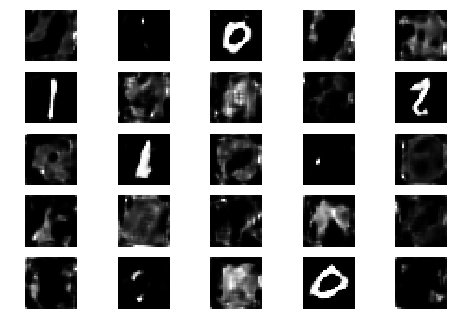

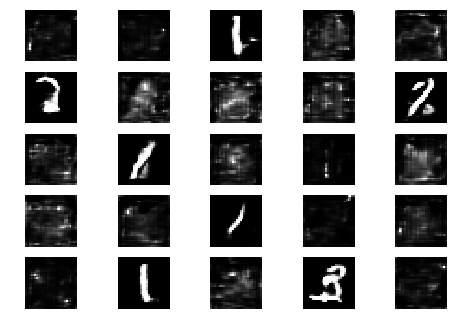

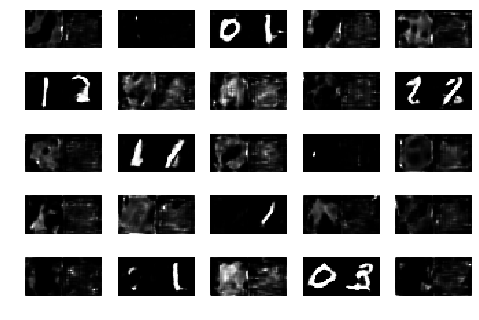

Epoch 1 Batch 1/937 [D loss: 0.714226, acc.: 57.81%] [G loss: 1.547228]
Epoch 1 Batch 2/937 [D loss: 0.444120, acc.: 84.38%] [G loss: 1.818203]
Epoch 1 Batch 3/937 [D loss: 0.807968, acc.: 46.88%] [G loss: 1.546825]
Epoch 1 Batch 4/937 [D loss: 0.428309, acc.: 87.50%] [G loss: 1.843799]
Epoch 1 Batch 5/937 [D loss: 0.469705, acc.: 78.12%] [G loss: 1.770748]
Epoch 1 Batch 6/937 [D loss: 0.456527, acc.: 81.25%] [G loss: 1.498733]
Epoch 1 Batch 7/937 [D loss: 0.319375, acc.: 95.31%] [G loss: 2.109329]
Epoch 1 Batch 8/937 [D loss: 0.286110, acc.: 95.31%] [G loss: 1.306549]
Epoch 1 Batch 9/937 [D loss: 0.444757, acc.: 76.56%] [G loss: 1.420698]
Epoch 1 Batch 10/937 [D loss: 0.547244, acc.: 73.44%] [G loss: 1.547585]
Epoch 1 Batch 11/937 [D loss: 0.375961, acc.: 89.06%] [G loss: 1.436595]
Epoch 1 Batch 12/937 [D loss: 0.434113, acc.: 78.12%] [G loss: 1.434306]
Epoch 1 Batch 13/937 [D loss: 0.211443, acc.: 98.44%] [G loss: 1.391657]
Epoch 1 Batch 14/937 [D loss: 0.989214, acc.: 34.38%] [G los

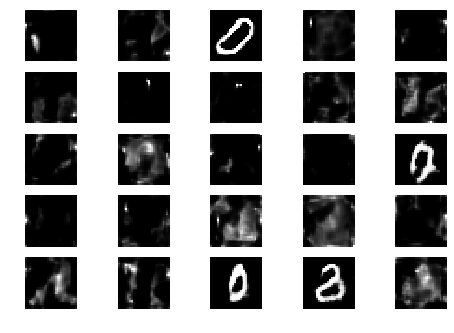

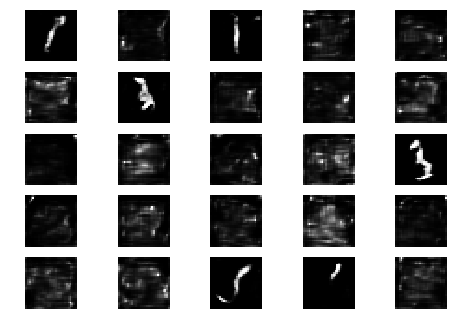

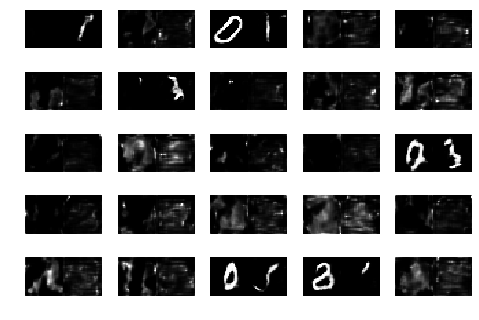

Epoch 1 Batch 101/937 [D loss: 0.680745, acc.: 57.81%] [G loss: 2.704974]
Epoch 1 Batch 102/937 [D loss: 0.968272, acc.: 56.25%] [G loss: 1.543293]
Epoch 1 Batch 103/937 [D loss: 0.798778, acc.: 60.94%] [G loss: 1.569793]
Epoch 1 Batch 104/937 [D loss: 0.335525, acc.: 84.38%] [G loss: 1.825680]
Epoch 1 Batch 105/937 [D loss: 0.390552, acc.: 85.94%] [G loss: 1.814007]
Epoch 1 Batch 106/937 [D loss: 0.499407, acc.: 79.69%] [G loss: 1.506278]
Epoch 1 Batch 107/937 [D loss: 0.656203, acc.: 59.38%] [G loss: 1.669380]
Epoch 1 Batch 108/937 [D loss: 0.377343, acc.: 87.50%] [G loss: 1.772891]
Epoch 1 Batch 109/937 [D loss: 0.508019, acc.: 79.69%] [G loss: 1.729606]
Epoch 1 Batch 110/937 [D loss: 0.484756, acc.: 79.69%] [G loss: 1.360530]
Epoch 1 Batch 111/937 [D loss: 0.718082, acc.: 54.69%] [G loss: 1.418839]
Epoch 1 Batch 112/937 [D loss: 0.348926, acc.: 92.19%] [G loss: 1.317517]
Epoch 1 Batch 113/937 [D loss: 0.766545, acc.: 54.69%] [G loss: 2.001617]
Epoch 1 Batch 114/937 [D loss: 0.53978

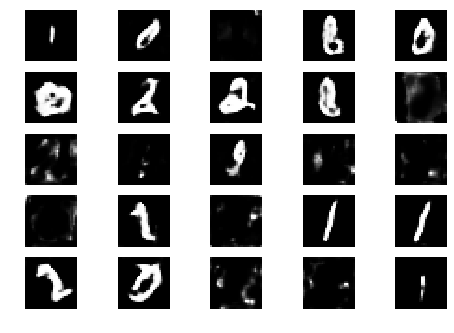

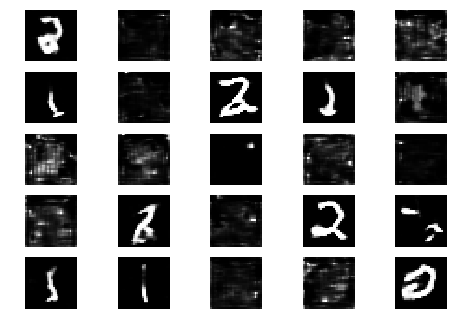

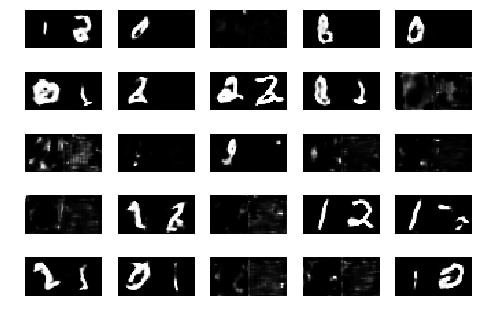

Epoch 1 Batch 201/937 [D loss: 0.487559, acc.: 75.00%] [G loss: 1.587572]
Epoch 1 Batch 202/937 [D loss: 0.251510, acc.: 93.75%] [G loss: 1.677433]
Epoch 1 Batch 203/937 [D loss: 0.378883, acc.: 89.06%] [G loss: 1.344480]
Epoch 1 Batch 204/937 [D loss: 0.995793, acc.: 57.81%] [G loss: 1.398927]
Epoch 1 Batch 205/937 [D loss: 0.554690, acc.: 76.56%] [G loss: 2.794569]
Epoch 1 Batch 206/937 [D loss: 0.533955, acc.: 71.88%] [G loss: 1.558017]
Epoch 1 Batch 207/937 [D loss: 0.393623, acc.: 87.50%] [G loss: 1.360394]
Epoch 1 Batch 208/937 [D loss: 0.724624, acc.: 51.56%] [G loss: 1.761722]
Epoch 1 Batch 209/937 [D loss: 0.795677, acc.: 45.31%] [G loss: 2.096716]
Epoch 1 Batch 210/937 [D loss: 0.460125, acc.: 82.81%] [G loss: 2.004579]
Epoch 1 Batch 211/937 [D loss: 0.383477, acc.: 89.06%] [G loss: 2.258081]
Epoch 1 Batch 212/937 [D loss: 0.367767, acc.: 85.94%] [G loss: 1.783620]
Epoch 1 Batch 213/937 [D loss: 0.849288, acc.: 54.69%] [G loss: 1.758099]
Epoch 1 Batch 214/937 [D loss: 0.75568

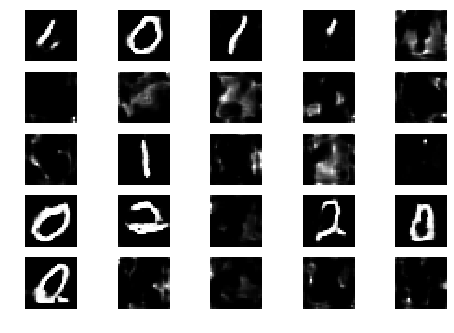

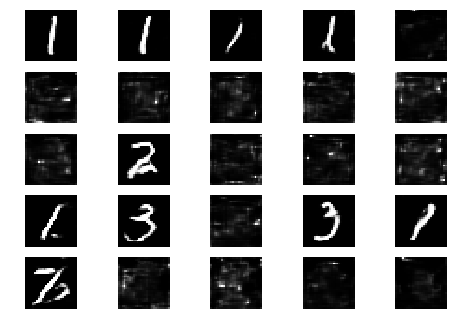

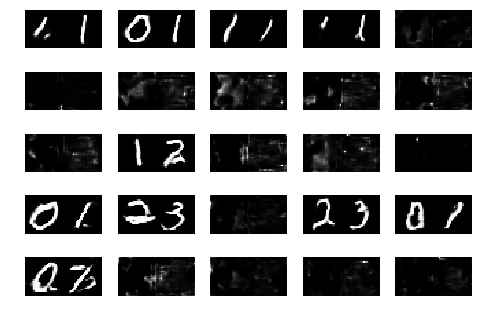

Epoch 1 Batch 301/937 [D loss: 0.379663, acc.: 89.06%] [G loss: 1.552233]
Epoch 1 Batch 302/937 [D loss: 1.017534, acc.: 53.12%] [G loss: 1.823016]
Epoch 1 Batch 303/937 [D loss: 0.542559, acc.: 64.06%] [G loss: 2.489932]
Epoch 1 Batch 304/937 [D loss: 0.497038, acc.: 82.81%] [G loss: 1.690433]
Epoch 1 Batch 305/937 [D loss: 0.879161, acc.: 35.94%] [G loss: 1.927737]
Epoch 1 Batch 306/937 [D loss: 0.339876, acc.: 96.88%] [G loss: 1.458737]
Epoch 1 Batch 307/937 [D loss: 0.725469, acc.: 54.69%] [G loss: 1.994946]
Epoch 1 Batch 308/937 [D loss: 0.548491, acc.: 71.88%] [G loss: 2.089774]
Epoch 1 Batch 309/937 [D loss: 0.570081, acc.: 73.44%] [G loss: 2.199964]
Epoch 1 Batch 310/937 [D loss: 0.740187, acc.: 50.00%] [G loss: 2.216688]
Epoch 1 Batch 311/937 [D loss: 0.418376, acc.: 82.81%] [G loss: 1.688603]
Epoch 1 Batch 312/937 [D loss: 0.441254, acc.: 85.94%] [G loss: 1.700938]
Epoch 1 Batch 313/937 [D loss: 0.434915, acc.: 73.44%] [G loss: 1.929036]
Epoch 1 Batch 314/937 [D loss: 0.37996

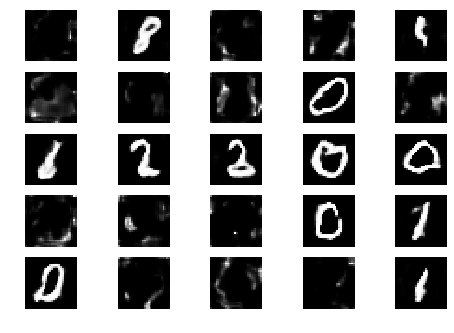

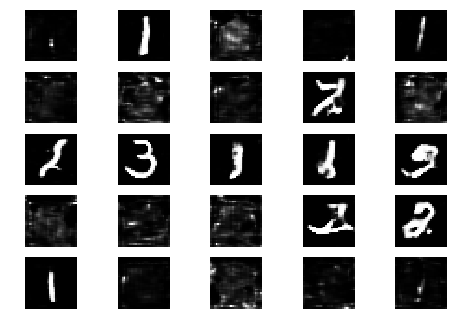

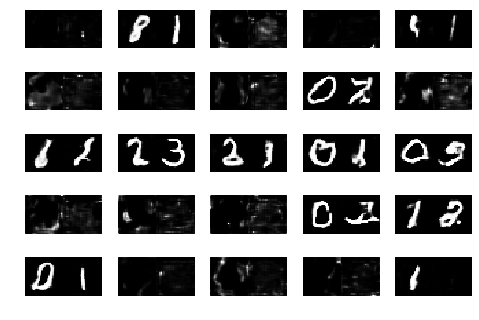

Epoch 1 Batch 401/937 [D loss: 0.429196, acc.: 81.25%] [G loss: 0.986171]
Epoch 1 Batch 402/937 [D loss: 0.607278, acc.: 65.62%] [G loss: 1.825971]
Epoch 1 Batch 403/937 [D loss: 0.721348, acc.: 60.94%] [G loss: 0.992075]
Epoch 1 Batch 404/937 [D loss: 0.423124, acc.: 81.25%] [G loss: 2.343806]
Epoch 1 Batch 405/937 [D loss: 0.519665, acc.: 75.00%] [G loss: 1.621132]
Epoch 1 Batch 406/937 [D loss: 0.438273, acc.: 87.50%] [G loss: 1.657779]
Epoch 1 Batch 407/937 [D loss: 0.398811, acc.: 89.06%] [G loss: 1.322473]
Epoch 1 Batch 408/937 [D loss: 0.854591, acc.: 56.25%] [G loss: 1.488108]
Epoch 1 Batch 409/937 [D loss: 0.574058, acc.: 67.19%] [G loss: 1.449055]
Epoch 1 Batch 410/937 [D loss: 1.145614, acc.: 31.25%] [G loss: 0.761569]
Epoch 1 Batch 411/937 [D loss: 0.520663, acc.: 78.12%] [G loss: 1.070327]
Epoch 1 Batch 412/937 [D loss: 0.415616, acc.: 84.38%] [G loss: 1.752495]
Epoch 1 Batch 413/937 [D loss: 0.543368, acc.: 71.88%] [G loss: 1.357859]
Epoch 1 Batch 414/937 [D loss: 0.44574

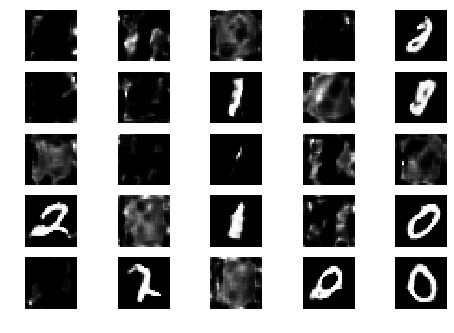

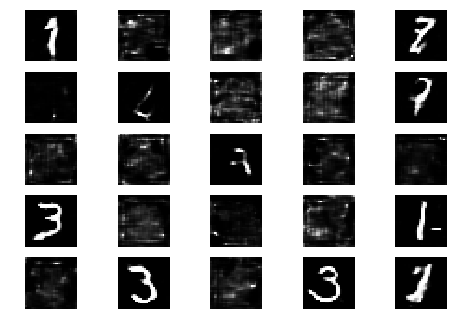

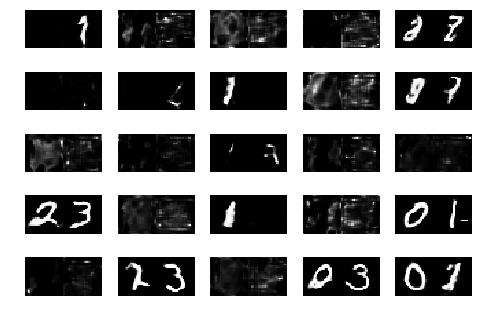

Epoch 1 Batch 501/937 [D loss: 0.801974, acc.: 51.56%] [G loss: 1.656694]
Epoch 1 Batch 502/937 [D loss: 0.451467, acc.: 82.81%] [G loss: 1.724948]
Epoch 1 Batch 503/937 [D loss: 0.498188, acc.: 75.00%] [G loss: 1.559532]
Epoch 1 Batch 504/937 [D loss: 0.328254, acc.: 92.19%] [G loss: 2.175995]
Epoch 1 Batch 505/937 [D loss: 0.396823, acc.: 87.50%] [G loss: 1.731868]
Epoch 1 Batch 506/937 [D loss: 0.713892, acc.: 54.69%] [G loss: 1.780325]
Epoch 1 Batch 507/937 [D loss: 0.349498, acc.: 87.50%] [G loss: 1.941847]
Epoch 1 Batch 508/937 [D loss: 0.767692, acc.: 50.00%] [G loss: 1.431411]
Epoch 1 Batch 509/937 [D loss: 0.632051, acc.: 68.75%] [G loss: 2.002832]
Epoch 1 Batch 510/937 [D loss: 0.604236, acc.: 68.75%] [G loss: 1.711922]
Epoch 1 Batch 511/937 [D loss: 0.444430, acc.: 71.88%] [G loss: 1.521644]
Epoch 1 Batch 512/937 [D loss: 0.418696, acc.: 84.38%] [G loss: 1.285566]
Epoch 1 Batch 513/937 [D loss: 0.504269, acc.: 71.88%] [G loss: 1.668285]
Epoch 1 Batch 514/937 [D loss: 0.71845

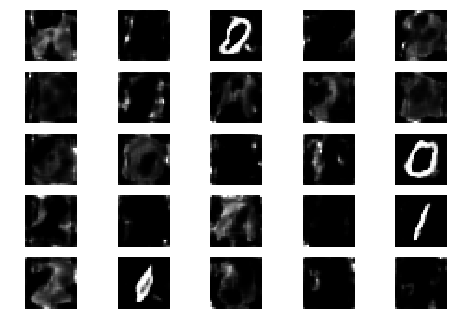

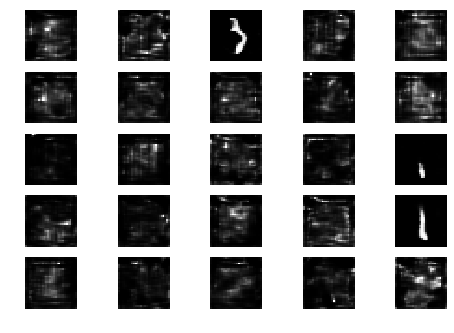

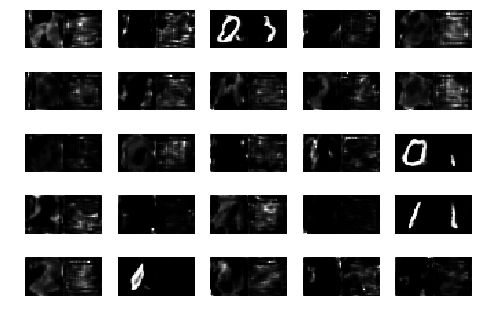

Epoch 1 Batch 601/937 [D loss: 0.719375, acc.: 48.44%] [G loss: 1.310370]
Epoch 1 Batch 602/937 [D loss: 0.470318, acc.: 84.38%] [G loss: 1.540972]
Epoch 1 Batch 603/937 [D loss: 0.647128, acc.: 62.50%] [G loss: 2.147156]
Epoch 1 Batch 604/937 [D loss: 0.346150, acc.: 89.06%] [G loss: 2.321258]
Epoch 1 Batch 605/937 [D loss: 0.487254, acc.: 81.25%] [G loss: 2.569096]
Epoch 1 Batch 606/937 [D loss: 0.692131, acc.: 60.94%] [G loss: 1.801179]
Epoch 1 Batch 607/937 [D loss: 0.396866, acc.: 82.81%] [G loss: 1.480943]
Epoch 1 Batch 608/937 [D loss: 0.760263, acc.: 48.44%] [G loss: 1.635405]
Epoch 1 Batch 609/937 [D loss: 0.470763, acc.: 84.38%] [G loss: 2.317339]
Epoch 1 Batch 610/937 [D loss: 0.358359, acc.: 92.19%] [G loss: 2.378998]
Epoch 1 Batch 611/937 [D loss: 0.505399, acc.: 73.44%] [G loss: 1.523957]
Epoch 1 Batch 612/937 [D loss: 0.417108, acc.: 87.50%] [G loss: 1.103489]
Epoch 1 Batch 613/937 [D loss: 0.884123, acc.: 39.06%] [G loss: 1.739436]
Epoch 1 Batch 614/937 [D loss: 0.47137

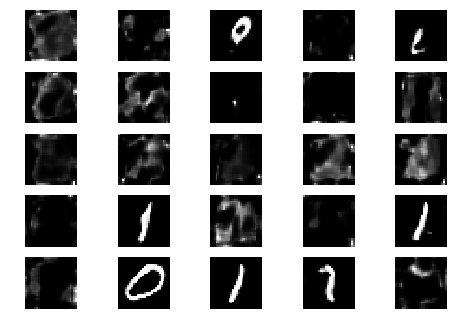

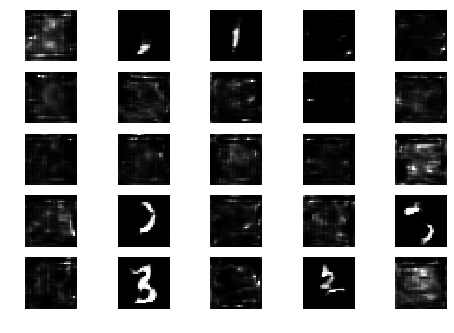

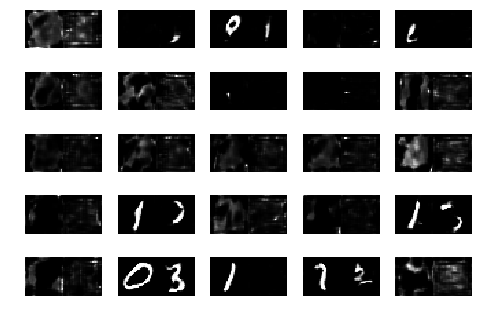

Epoch 1 Batch 701/937 [D loss: 0.518783, acc.: 65.62%] [G loss: 1.419412]
Epoch 1 Batch 702/937 [D loss: 0.534359, acc.: 79.69%] [G loss: 1.608142]
Epoch 1 Batch 703/937 [D loss: 0.693375, acc.: 62.50%] [G loss: 1.518228]
Epoch 1 Batch 704/937 [D loss: 0.468237, acc.: 85.94%] [G loss: 1.932398]
Epoch 1 Batch 705/937 [D loss: 0.604276, acc.: 71.88%] [G loss: 1.454522]
Epoch 1 Batch 706/937 [D loss: 0.544630, acc.: 76.56%] [G loss: 1.309198]
Epoch 1 Batch 707/937 [D loss: 0.833747, acc.: 35.94%] [G loss: 1.640368]
Epoch 1 Batch 708/937 [D loss: 0.378548, acc.: 87.50%] [G loss: 1.332219]
Epoch 1 Batch 709/937 [D loss: 0.507565, acc.: 71.88%] [G loss: 1.835264]
Epoch 1 Batch 710/937 [D loss: 0.387458, acc.: 87.50%] [G loss: 2.278105]
Epoch 1 Batch 711/937 [D loss: 0.600027, acc.: 67.19%] [G loss: 1.345295]
Epoch 1 Batch 712/937 [D loss: 0.873179, acc.: 43.75%] [G loss: 1.548575]
Epoch 1 Batch 713/937 [D loss: 0.313914, acc.: 92.19%] [G loss: 1.777765]
Epoch 1 Batch 714/937 [D loss: 0.32485

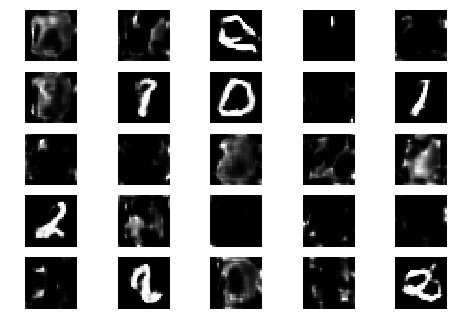

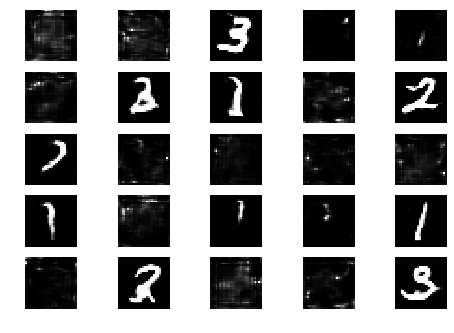

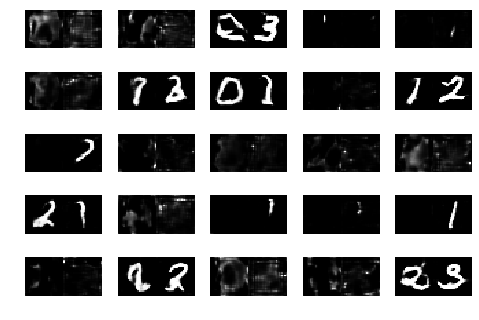

Epoch 1 Batch 801/937 [D loss: 0.470269, acc.: 73.44%] [G loss: 1.118224]
Epoch 1 Batch 802/937 [D loss: 0.580335, acc.: 62.50%] [G loss: 2.125298]
Epoch 1 Batch 803/937 [D loss: 0.348584, acc.: 82.81%] [G loss: 1.715919]
Epoch 1 Batch 804/937 [D loss: 0.487498, acc.: 76.56%] [G loss: 1.370834]
Epoch 1 Batch 805/937 [D loss: 0.760927, acc.: 56.25%] [G loss: 1.035944]
Epoch 1 Batch 806/937 [D loss: 0.606883, acc.: 76.56%] [G loss: 1.354086]
Epoch 1 Batch 807/937 [D loss: 0.272977, acc.: 98.44%] [G loss: 1.850833]
Epoch 1 Batch 808/937 [D loss: 0.501680, acc.: 78.12%] [G loss: 2.133890]
Epoch 1 Batch 809/937 [D loss: 0.351962, acc.: 90.62%] [G loss: 1.360903]
Epoch 1 Batch 810/937 [D loss: 0.681125, acc.: 59.38%] [G loss: 2.357145]
Epoch 1 Batch 811/937 [D loss: 0.379807, acc.: 92.19%] [G loss: 2.515867]
Epoch 1 Batch 812/937 [D loss: 0.655115, acc.: 62.50%] [G loss: 1.971981]
Epoch 1 Batch 813/937 [D loss: 0.811952, acc.: 48.44%] [G loss: 0.969722]
Epoch 1 Batch 814/937 [D loss: 0.83735

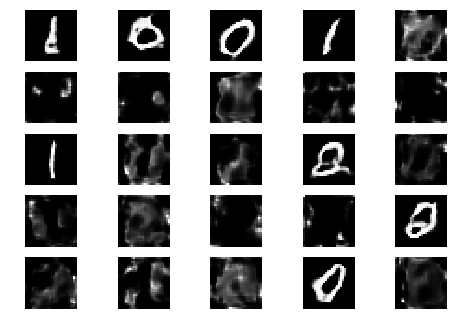

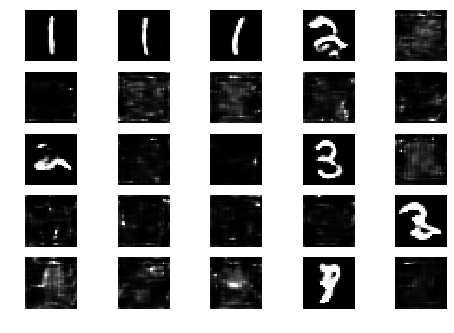

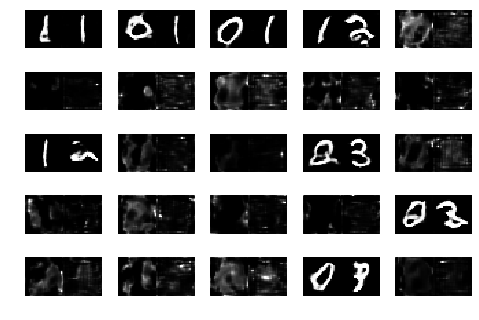

Epoch 1 Batch 901/937 [D loss: 0.439661, acc.: 78.12%] [G loss: 1.605534]
Epoch 1 Batch 902/937 [D loss: 0.496301, acc.: 84.38%] [G loss: 1.004757]
Epoch 1 Batch 903/937 [D loss: 0.409866, acc.: 81.25%] [G loss: 1.579922]
Epoch 1 Batch 904/937 [D loss: 0.561054, acc.: 68.75%] [G loss: 1.724702]
Epoch 1 Batch 905/937 [D loss: 0.676889, acc.: 62.50%] [G loss: 1.408007]
Epoch 1 Batch 906/937 [D loss: 0.635659, acc.: 60.94%] [G loss: 2.031482]
Epoch 1 Batch 907/937 [D loss: 0.541227, acc.: 75.00%] [G loss: 0.951863]
Epoch 1 Batch 908/937 [D loss: 0.401800, acc.: 90.62%] [G loss: 2.112975]
Epoch 1 Batch 909/937 [D loss: 0.480167, acc.: 79.69%] [G loss: 1.923611]
Epoch 1 Batch 910/937 [D loss: 0.500061, acc.: 78.12%] [G loss: 2.214280]
Epoch 1 Batch 911/937 [D loss: 0.392111, acc.: 90.62%] [G loss: 1.720217]
Epoch 1 Batch 912/937 [D loss: 0.678591, acc.: 59.38%] [G loss: 2.300999]
Epoch 1 Batch 913/937 [D loss: 0.533270, acc.: 67.19%] [G loss: 1.426918]
Epoch 1 Batch 914/937 [D loss: 0.32856

In [35]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=100, modeltotrain = 3)

In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
!rm -rf generator1fminst.h5



In [0]:

generator1.save('generator1fminst.h5')



In [0]:
files.download('generator1fminst.h5')


In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 2 ,  loadpretrainedweights=False)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=20, modeltotrain=3)

In [0]:
!rm -rf generator2fmnist.h5


In [0]:

generator2.save('generator2fmnist.h5')

In [0]:
!ls -al


In [0]:
files.download('generator2fmnist.h5')

In [0]:
##!wget https://github.com/rajagopalmotivate/try1/raw/master/generatorTrainedepoch2git.h5

In [0]:
!rm -rf generator1fminst.h5
!rm -rf generator2fminst.h5

In [0]:
!ls -all

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator1fminst.h5

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator2fminst.h5

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
plotamodel(combined, showdetails=True )
files.download('model.png')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
plotamodel(combined)
files.download('model.png')

In [0]:
!rm -rf generatorTrainedepoch2.h5

generator1.save('generator1fminst.h5')

!rm -rf generator2Trainedepoch2.h5

generator2.save('generator2fminst.h5')


In [0]:
generator1 = generator1.load_weights('generator1fmnist.h5')


In [0]:
generator2 = generator2.load_weights('generator1fminst.h5')




In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1)

In [0]:
generator1.save('generatorTrained1epoch4.h5')

In [0]:
files.download('generator1fmnist.h5')

In [0]:
files.download('generator2fmnist.h5')

In [0]:
##files.download('discriminator1.h5')

In [0]:
##files.download('combined1.h5')

In [0]:
#generator1 = load_model('generator1.h5')
#discriminator1 = load_model('discriminator1.h5')
#combined1 = load_model('combined1.h5')

